## Investigating the Survival of Patients with Breast Cancer

## 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd

In [ ]:
# pip install lifelines

In [3]:
try:
    from lifelines import KaplanMeierFitter
except ImportError:
    kaplanMeierFitter= None

# Check if the KaplanMeierFitter class is available
if KaplanMeierFitter is not None:
    # Proceed with the kaplan-Meier analysis using Lifelines
    kmf= KaplanMeierFitter()

## 2. Load Dataset

In [4]:
from google.colab import files
uploaded= files.upload()

Saving breast_cancer_survival.csv to breast_cancer_survival.csv


In [5]:
df = pd.read_csv(r'breast_cancer_survival.csv')
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


## Information about the dataset

Our data consists of two types of breast cancer patients:
### 1. Triple Positive breast cancer [ If ER, PR & HER2 is positive]

### 2.  Group 1 (luminal A) [ If ER, PR are positive and HER2 is negative]

This group includes tumors that are ER positive and PR positive, but negative for HER2. Luminal A breast cancers are likely to benefit from hormone therapy and may also benefit from chemotherapy.

* ER (Estrogen receptor)
* PR (Progesterone receptor)
* HER2 (human epidermal growth factor receptor 2)

https://www.komen.org/breast-cancer/diagnosis/factors-that-affect-prognosis/tumor-characteristics/#:~:text=In%20this%20case%2C%20hormone%20receptor,called%20triple%20negative%20breast%20cancer.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 334 non-null    int64  
 1   Gender              334 non-null    object 
 2   Protein1            334 non-null    float64
 3   Protein2            334 non-null    float64
 4   Protein3            334 non-null    float64
 5   Protein4            334 non-null    float64
 6   Tumour_Stage        334 non-null    object 
 7   Histology           334 non-null    object 
 8   ER status           334 non-null    object 
 9   PR status           334 non-null    object 
 10  HER2 status         334 non-null    object 
 11  Surgery_type        334 non-null    object 
 12  Date_of_Surgery     334 non-null    object 
 13  Date_of_Last_Visit  317 non-null    object 
 14  Patient_Status      321 non-null    object 
dtypes: float64(4), int64(1), object(10)
memory usage: 39.3+ K

In [7]:
df.shape

(334, 15)

In [8]:
df.isnull().sum()

Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [9]:
df= df.dropna()

In [10]:
df.isnull().sum()

Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

## 3. Exploratory Data Analysis(EDA)

### (i) Age Distribution of Patients

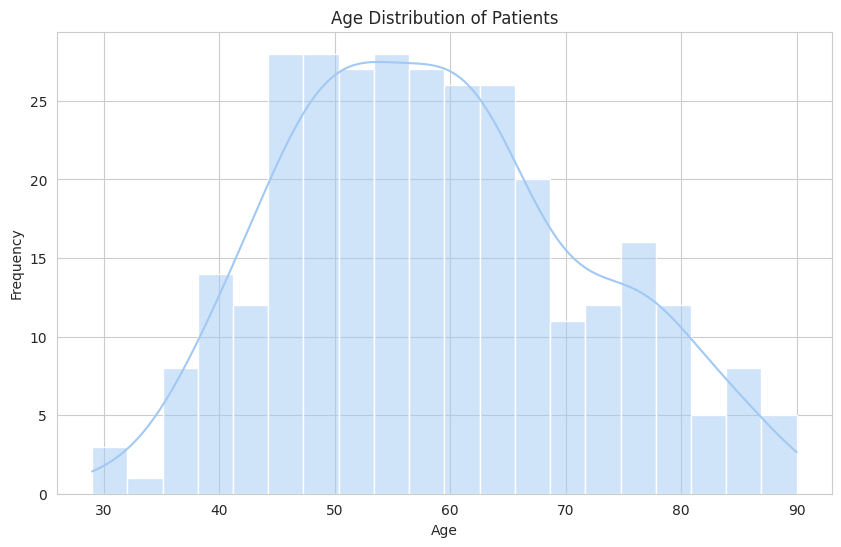

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style and color palette
sns.set_style("whitegrid")
sns.set_palette("pastel")

# Create a histogram for the Age column
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins= 20, kde= True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The majority of the age group falls within 45 to 65 age group peoples.

### (ii) Survival Rates by Tumour Stage

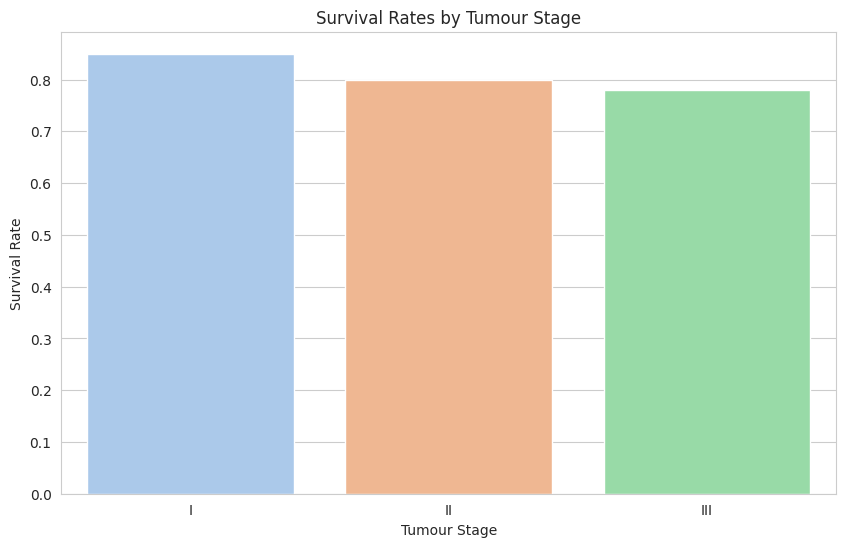

In [12]:
# Create a dataframe with the survival status for each tumour stage
survival_by_stage= df.groupby(['Tumour_Stage', 'Patient_Status']).size().unstack().reset_index()

# Calculate the survival rate for each stage
survival_by_stage['Survival_Rate']= survival_by_stage['Alive']/ (survival_by_stage['Alive'] + survival_by_stage['Dead'])

# Create a bar plot for the survival rates by stage
plt.figure(figsize=(10,6))
sns.barplot(x= 'Tumour_Stage', y= 'Survival_Rate', data= survival_by_stage)
plt.title('Survival Rates by Tumour Stage')
plt.xlabel('Tumour Stage')
plt.ylabel('Survival Rate')
plt.show()

Survival rate is seen more in Tumour Stage I & least in Tumour Stage III.

### (iii) Survival Rates by Surgery Type

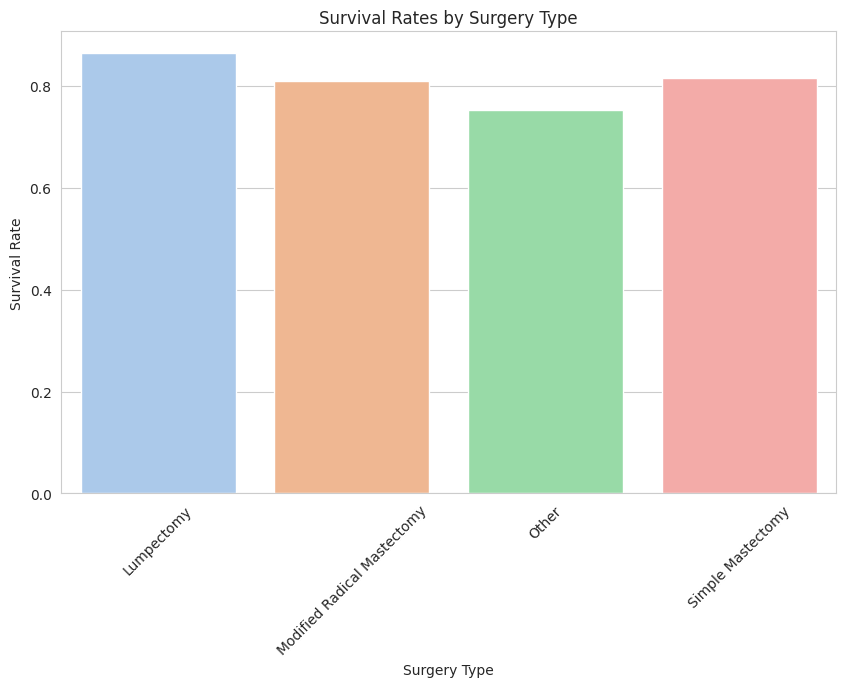

In [13]:
# Create a dataframe with the survival status for each surgery type
survival_by_surgery= df.groupby(['Surgery_type', 'Patient_Status']).size().unstack().reset_index()

# Calculate the survival rate for each surgery type
survival_by_surgery['Survival_Rate']= survival_by_surgery['Alive'] / (survival_by_surgery['Alive'] + survival_by_surgery['Dead'])

# Create a bar plot for the survival rates by surgery type
plt.figure(figsize= (10,6))
sns.barplot(x= 'Surgery_type', y= 'Survival_Rate', data= survival_by_surgery)
plt.title('Survival Rates by Surgery Type')
plt.xlabel('Surgery Type')
plt.ylabel('Survival Rate')
plt.xticks(rotation= 45)
plt.show()

Rate of Survival is more in patients with Lumpectomy and Simple Mastectomy surgery type compared to Modified Radical Mastectomy and Other surgeries.

### (iv) Distribution of HER2 Status

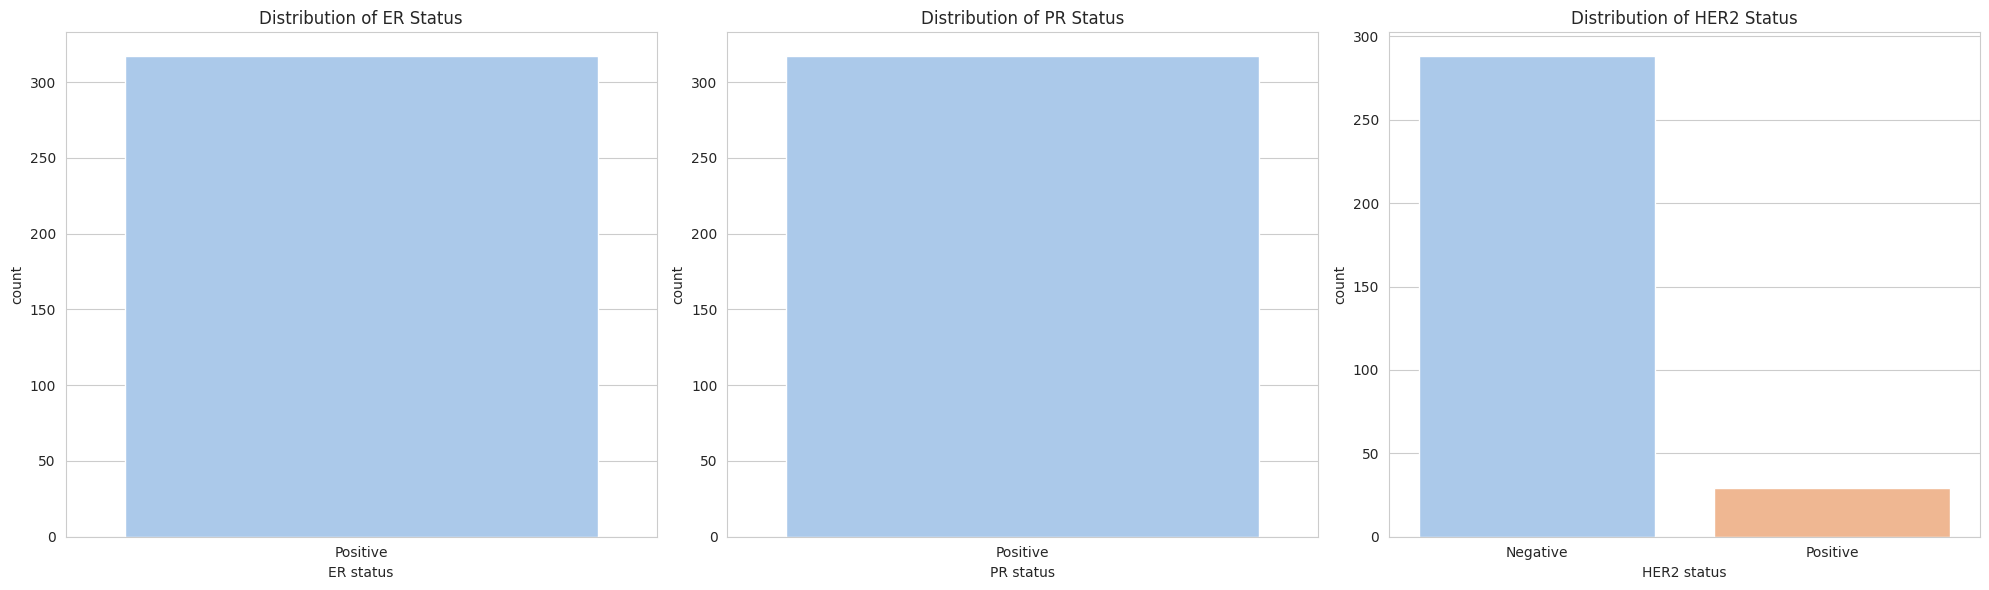

In [14]:
# Create a countplot for the ER status, PR status, and HER2 status columns
fig, ax= plt.subplots(1,3, figsize= (20,6))

sns.countplot(x= 'ER status', data= df, ax= ax[0])
ax[0].set_title('Distribution of ER Status')

sns.countplot(x= 'PR status', data=df, ax= ax[1])
ax[1].set_title('Distribution of PR Status')

sns.countplot(x= 'HER2 status', data= df, ax= ax[2])
ax[2].set_title('Distribution of HER2 Status')

plt.tight_layout()
plt.show()

Distribution of ER & PR status is positive, whereas in the distribution of HER2 status most of the tumours are negative HER2 status and some with HER2 positive.

### (v) Survival Rates by each hormone receptor status

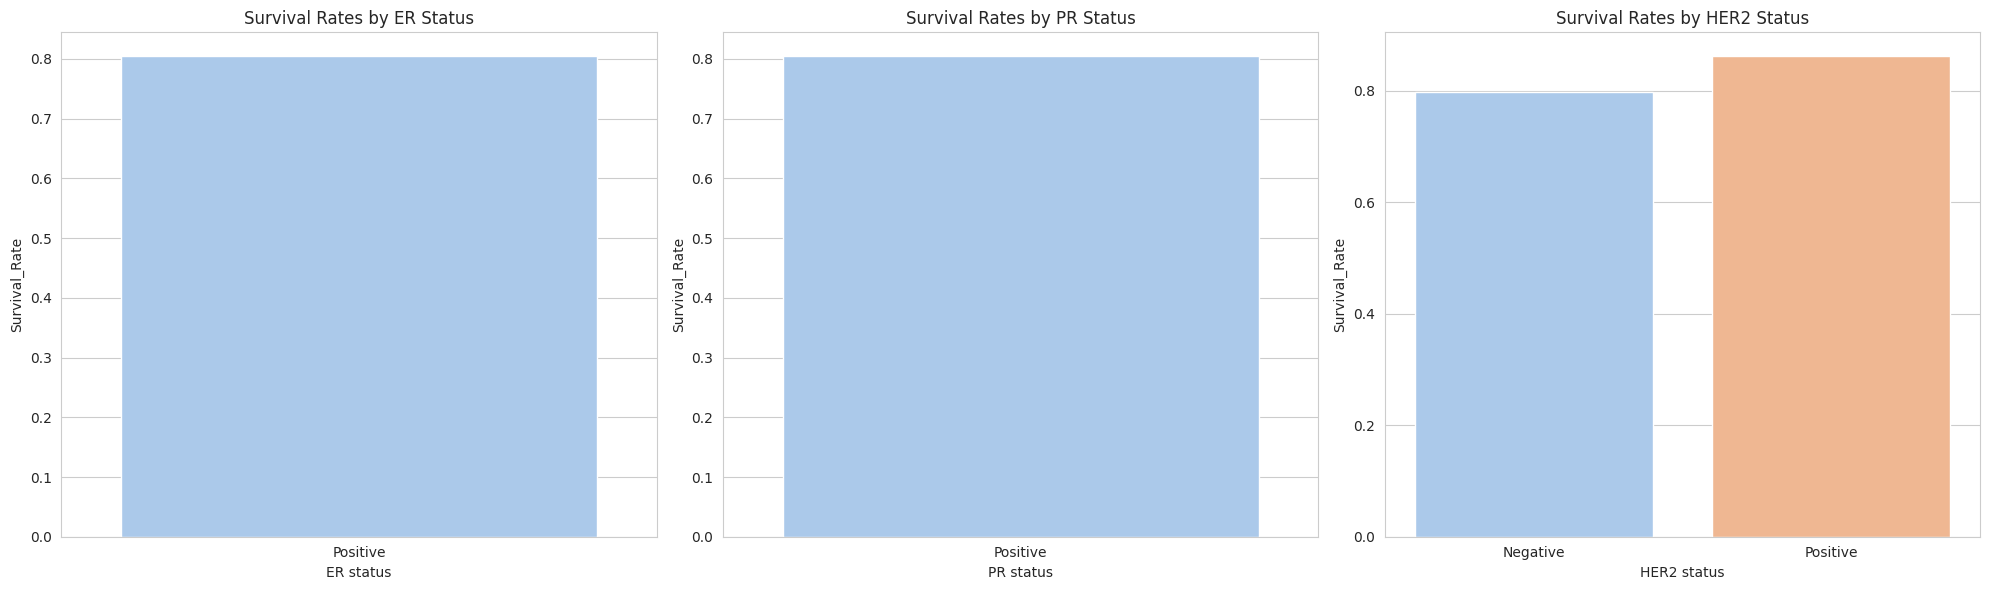

In [15]:
# Create dataframes with the survival status for each hormone receptor status
survival_by_er_status= df.groupby(['ER status', 'Patient_Status']).size().unstack().reset_index()
survival_by_pr_status= df.groupby(['PR status', 'Patient_Status']).size().unstack().reset_index()
survival_by_her2_status= df.groupby(['HER2 status', 'Patient_Status']).size().unstack().reset_index()

# Calculate the survival rate for each hormone receptor status
survival_by_er_status['Survival_Rate']= survival_by_er_status['Alive'] / (survival_by_er_status['Alive'] + survival_by_er_status['Dead'])
survival_by_pr_status['Survival_Rate']= survival_by_pr_status['Alive'] / (survival_by_pr_status['Alive'] + survival_by_pr_status['Dead'])
survival_by_her2_status['Survival_Rate']= survival_by_her2_status['Alive'] / (survival_by_her2_status['Alive'] + survival_by_her2_status['Dead'])

# Create bar plots for the survival rates by hormone receptor status
fig, ax= plt.subplots(1,3, figsize= (20,6))

sns.barplot(x= 'ER status', y= 'Survival_Rate', data= survival_by_er_status, ax=ax[0])
ax[0].set_title('Survival Rates by ER Status')

sns.barplot(x= 'PR status', y= 'Survival_Rate', data= survival_by_pr_status, ax=ax[1])
ax[1].set_title('Survival Rates by PR Status')

sns.barplot(x= 'HER2 status', y= 'Survival_Rate', data= survival_by_her2_status, ax=ax[2])
ax[2].set_title('Survival Rates by HER2 Status')

plt.tight_layout()
plt.show()

Survival rate is seen more in tumours with ER & PR positive status, whereas in Survival rate is seen more in tumours with HER2 positive and comparatively less with HER2 negative status.

### (vi) Protein1 Levels by Patients Status

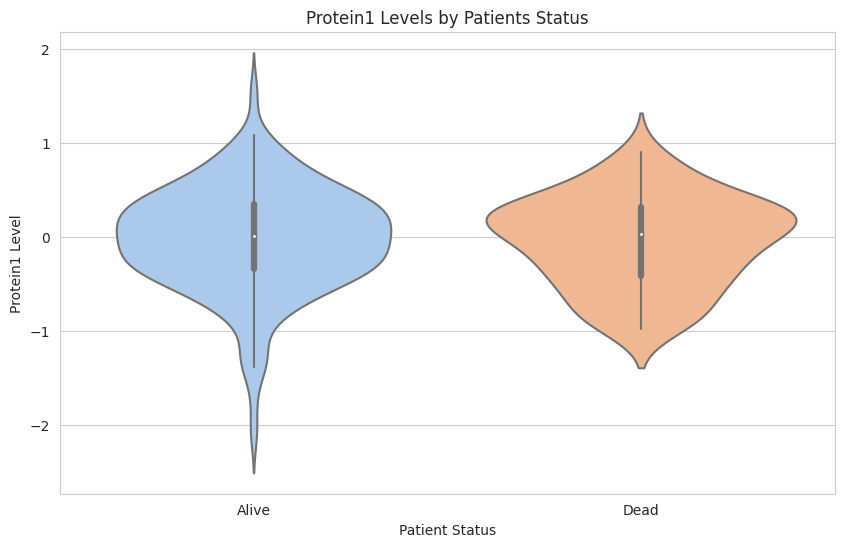

In [16]:
# Create a violin plot for the Protein1 levels by patient status
plt.figure(figsize= (10,6))
sns.violinplot(x='Patient_Status', y= 'Protein1', data= df)
plt.title('Protein1 Levels by Patients Status')
plt.xlabel('Patient Status')
plt.ylabel('Protein1 Level')
plt.show()

### (vii) Distribution of Histology Types

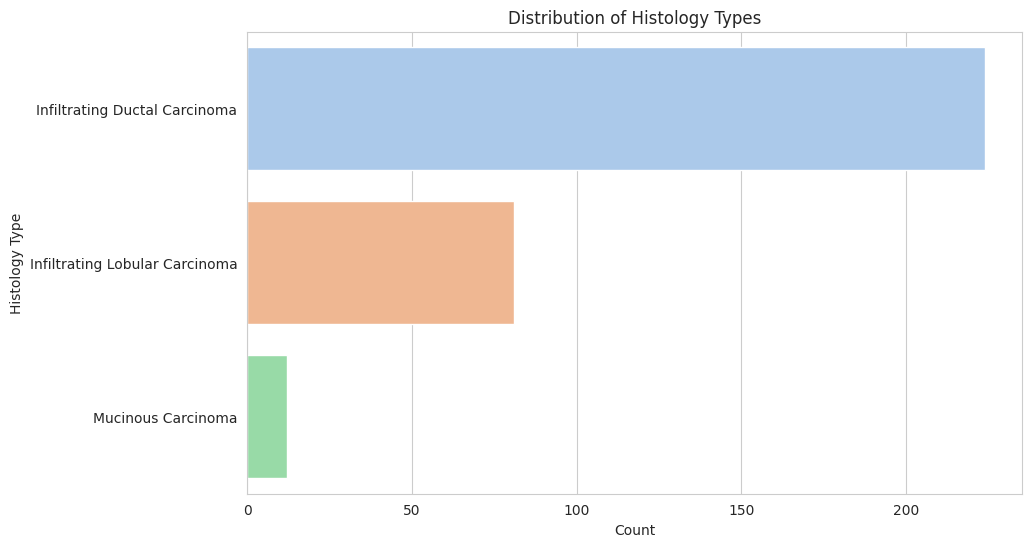

In [17]:
# Create a counplot for the Histology column
plt.figure(figsize= (10,6))
sns.countplot(y="Histology", data=df, order= df['Histology'].value_counts().index)
plt.title('Distribution of Histology Types')
plt.xlabel('Count')
plt.ylabel('Histology Type')
plt.show()

So the Distribution of Histology Types indicates that Infiltrating Ductal Carcinoma is the most prominent whereas Mucinous Carcinoma is the least prominent in the patients.

### (viii) Distribution of Survival Time

In [18]:
# Convert the date columns to datetime format
df['Date_of_Surgery']= pd.to_datetime(df['Date_of_Surgery'])
df['Date_of_Last_Visit']= pd.to_datetime(df['Date_of_Last_Visit'])

<ipython-input-18-175584871a6e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_of_Surgery']= pd.to_datetime(df['Date_of_Surgery'])
<ipython-input-18-175584871a6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date_of_Last_Visit']= pd.to_datetime(df['Date_of_Last_Visit'])


<ipython-input-19-a3547d4af1bf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survival_Time_Days']= (df['Date_of_Last_Visit'] - df['Date_of_Surgery']).dt.days
<ipython-input-19-a3547d4af1bf>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Survival_Time_Months']= df['Survival_Time_Days'] / 30.44


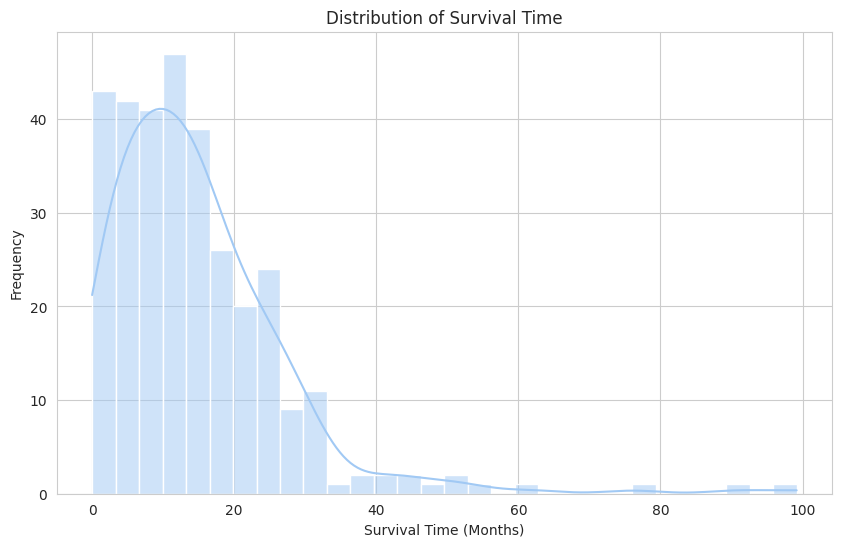

In [19]:
# Calculating the survival time in days
df['Survival_Time_Days']= (df['Date_of_Last_Visit'] - df['Date_of_Surgery']).dt.days

# Convert the survival time to months
df['Survival_Time_Months']= df['Survival_Time_Days'] / 30.44

# Create a histogram for the Survival_Time_Months column
plt.figure(figsize= (10,6))
sns.histplot(df['Survival_Time_Months'], bins= 30, kde= True)
plt.title('Distribution of Survival Time')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Frequency')
plt.show()

In [20]:
# Check for missing or infinite values in the 'Survival_Time_Month' and protein columns
missing_or_infinite_values= df[['Protein1', 'Protein2', 'Protein3', 'Protein4', 'Survival_Time_Months']].isnull().sum()
missing_or_infinite_values

Protein1                0
Protein2                0
Protein3                0
Protein4                0
Survival_Time_Months    0
dtype: int64

In [21]:
# Remove the rows with missing values in the 'Survival_Time_Months' column
df_clean= df.dropna(subset= ['Survival_Time_Months'])

# Check the number of rows in the cleaned dataframe
len(df_clean)

317

### (ix) Age at Diagnosis vs Survival Time

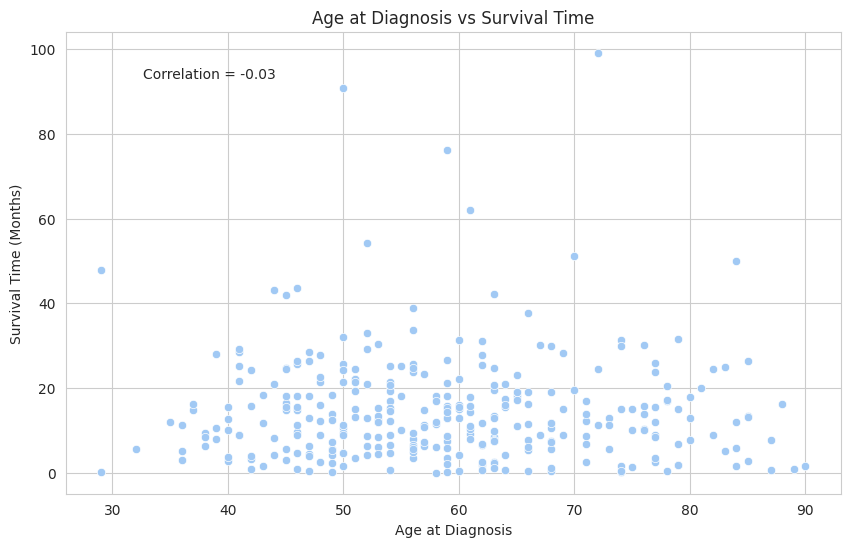

In [22]:
from scipy.stats import pearsonr

# Create a scatter plot for the Age vs Survival Time
plt.figure(figsize= (10,6))
sns.scatterplot(x= 'Age', y='Survival_Time_Months', data= df_clean)
plt.title('Age at Diagnosis vs Survival Time')
plt.xlabel('Age at Diagnosis')
plt.ylabel('Survival Time (Months)')

# Calculate the correlation between Age and Survival Time
corr_age_survival, _= pearsonr(df_clean['Age'], df_clean['Survival_Time_Months'])
plt.annotate(f'Correlation = {corr_age_survival:.2f}', xy=(0.1,0.9), xycoords= 'axes fraction')

plt.show()

### (x) Survival Time by Gender

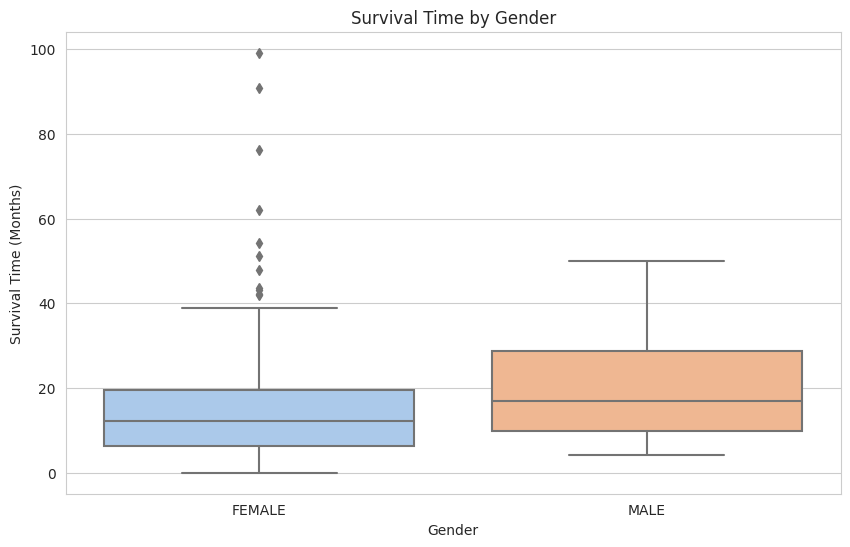

In [23]:
# Create a box plot for the Survival Time by Gender
plt.figure(figsize= (10,6))
sns.boxplot(x= 'Gender', y='Survival_Time_Months', data=df_clean)
plt.title('Survival Time by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Time (Months)')
plt.show()

Survival time is more for male patients compared to female patients.

### (xi) Survival Time by HER2 Status

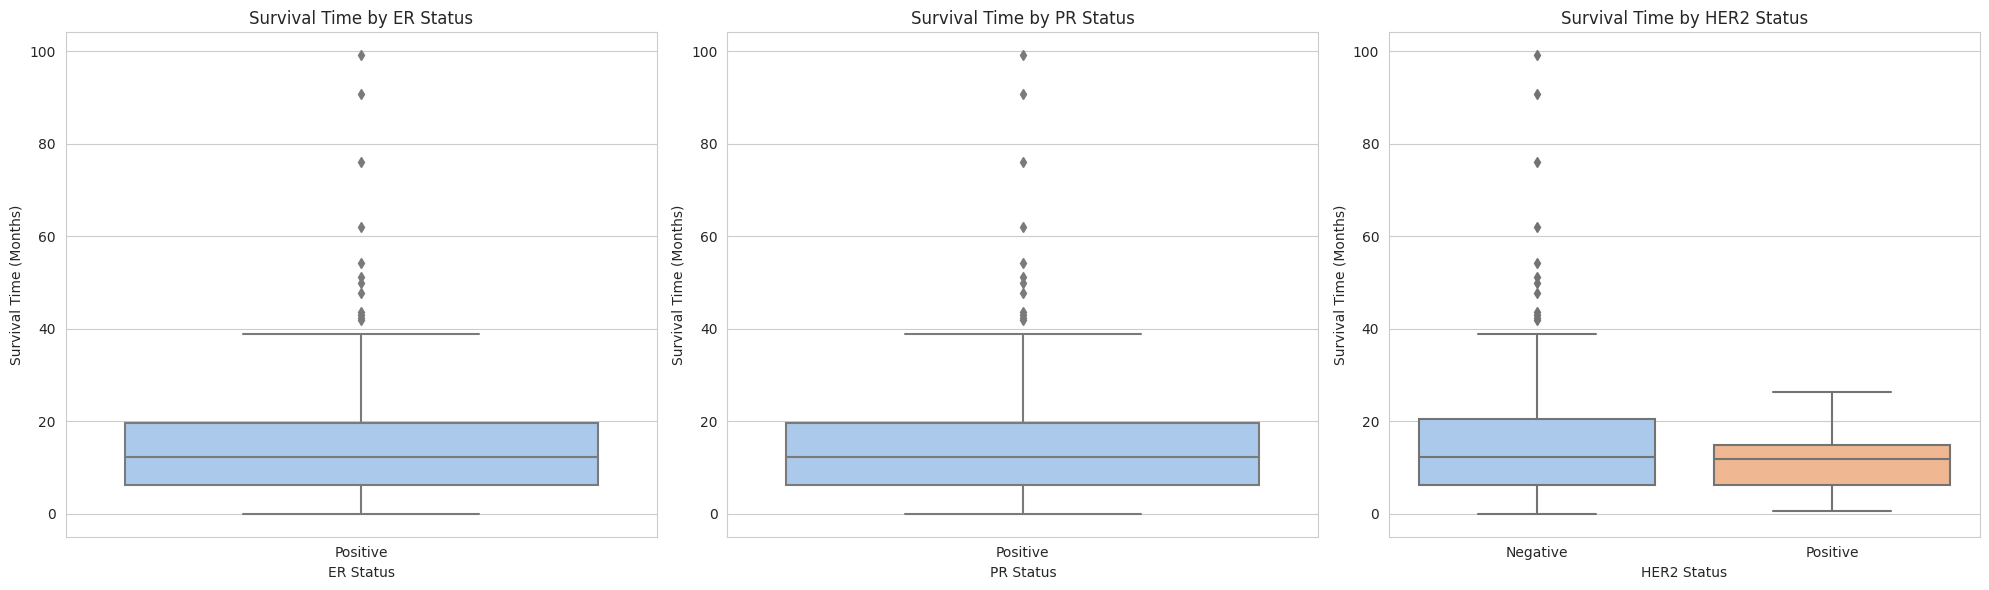

In [24]:
# Create box plot for the survival time by hormone receptor status
fig, ax= plt.subplots(1,3, figsize= (20,6))

sns.boxplot(x= 'ER status', y= 'Survival_Time_Months', data= df_clean, ax= ax[0])
ax[0].set_title('Survival Time by ER Status')
ax[0].set_xlabel('ER Status')
ax[0].set_ylabel('Survival Time (Months)')

sns.boxplot(x= 'PR status', y= 'Survival_Time_Months', data= df_clean, ax= ax[1])
ax[1].set_title('Survival Time by PR Status')
ax[1].set_xlabel('PR Status')
ax[1].set_ylabel('Survival Time (Months)')

sns.boxplot(x= 'HER2 status', y= 'Survival_Time_Months', data= df_clean, ax= ax[2])
ax[2].set_title('Survival Time by HER2 Status')
ax[2].set_xlabel('HER2 Status')
ax[2].set_ylabel('Survival Time (Months)')

plt.tight_layout()
plt.show()

Survival Time is less for tumours with positive HER2 status compared to negative HER2 status.

### (xii) Survival Time by Surgery Type

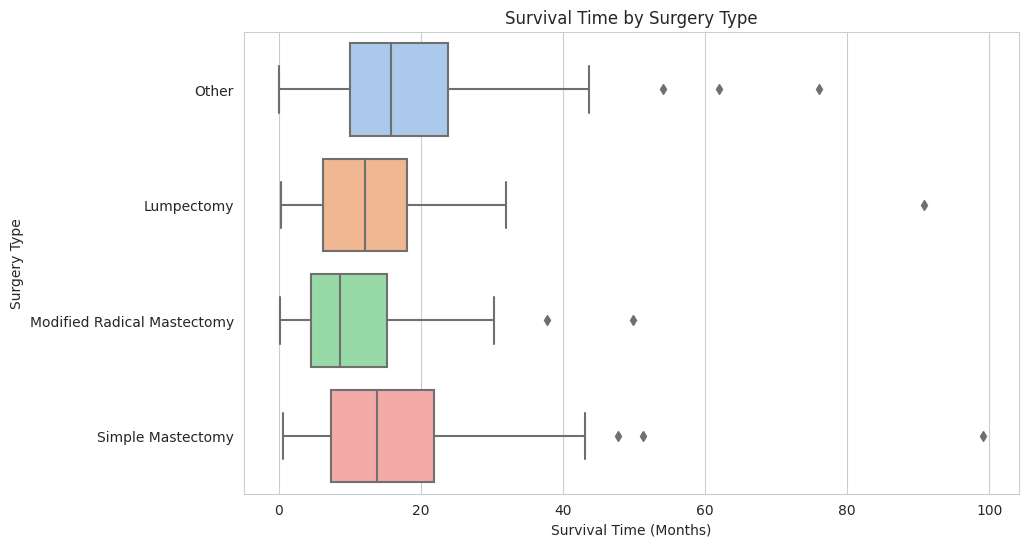

In [25]:
# Create a box plot for the survival time by surgery type
plt.figure(figsize= (10,6))
sns.boxplot(x= 'Survival_Time_Months', y= 'Surgery_type', data= df_clean)
plt.title('Survival Time by Surgery Type')
plt.xlabel('Survival Time (Months)')
plt.ylabel('Surgery Type')
plt.show()

Simple Mastectomy and Other surgeries has the highest survival time compared to Modified Radical Mastectomy and Lumpectomy.

### (xiii) Age at Diagnosis by Tumour Stage

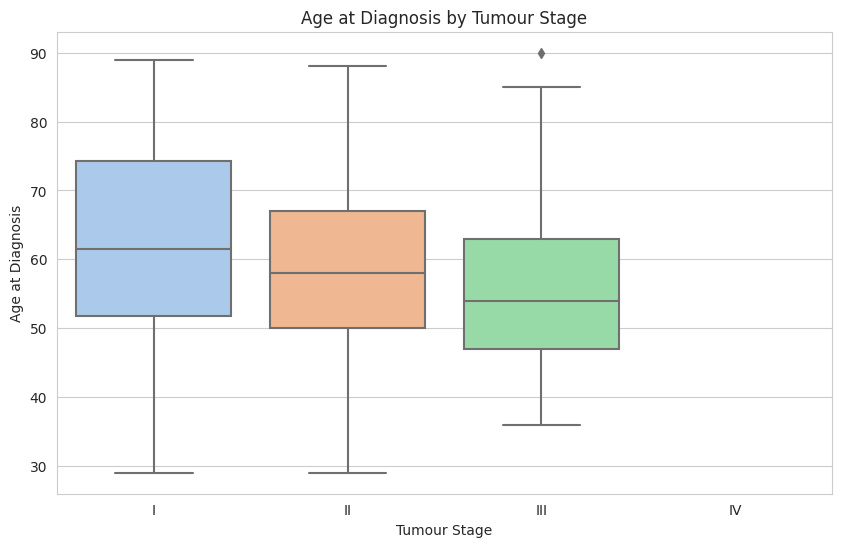

In [26]:
# Create a box plot for the Age by Tumour Stage
plt.figure(figsize= (10,6))
sns.boxplot(x= 'Tumour_Stage', y='Age', data=df_clean, order= ['I', 'II', 'III', 'IV'])
plt.title('Age at Diagnosis by Tumour Stage')
plt.xlabel('Tumour Stage')
plt.ylabel('Age at Diagnosis')
plt.show()

Tumour Stage group I = 52 to 75 age group,

Tumour Stage group II= 50 to 78 age group,

Tumour Stage group III= 48 to 63 age group

### (xiv) Distribution of Time Since Surgery for Patients Still Alive

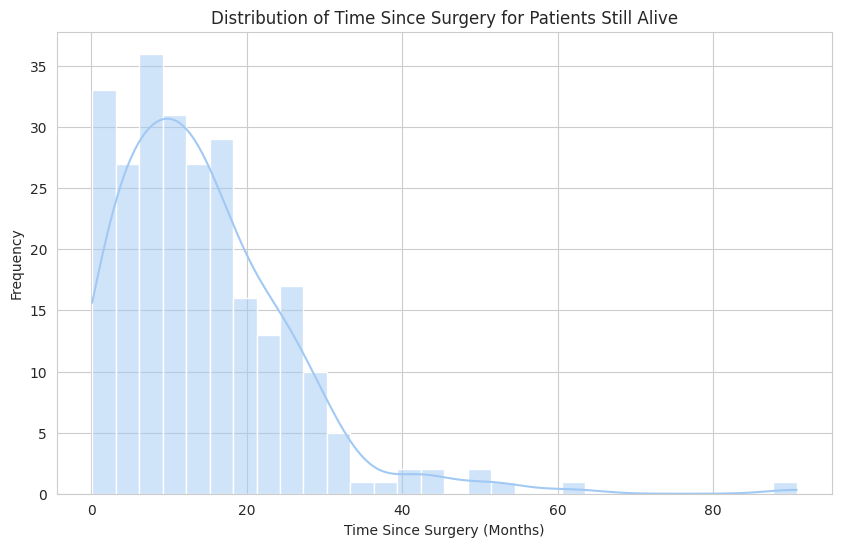

In [27]:
# Filter the dataframe to include only patients who are still alive
df_alive= df_clean[df_clean['Patient_Status'] == 'Alive']

# Create a histogram for the time since surgery
plt.figure(figsize= (10,6))
sns.histplot(df_alive['Survival_Time_Months'], bins= 30, kde= True)
plt.title('Distribution of Time Since Surgery for Patients Still Alive')
plt.xlabel('Time Since Surgery (Months)')
plt.ylabel('Frequency')
plt.show()

As it can be interpreted that the patients are less likely to survive after 30-40 months since surgery.

### (xv) Kaplan-Meier Survival Curves by Surgery Type

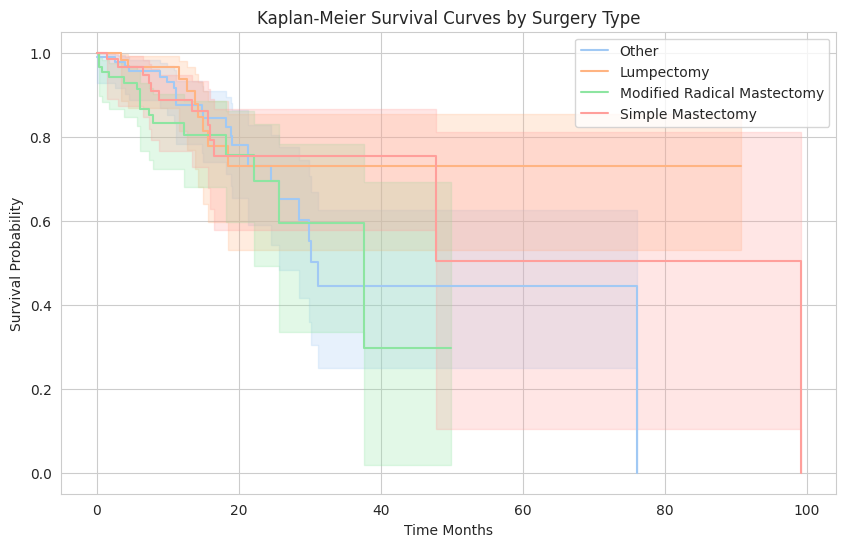

In [28]:
# Identify the unique Surgery Types in the dataset
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter

# Convert 'Patient_Status' to 0 for censored and 1 for an event
df_clean['Event'] = df_clean['Patient_Status'].map({'Alive': 0, 'Dead': 1})

# Ensure 'Survival_Time_Months' is numerical (convert it if needed)
df_clean['Survival_Time_Months'] = pd.to_numeric(df_clean['Survival_Time_Months'], errors='coerce')

# Filter out rows with missing or NaN values in 'Survival_Time_Months'
df_clean = df_clean.dropna(subset=['Survival_Time_Months'])

T = df_clean['Survival_Time_Months']
E = df_clean['Event']

# Identify the unique Surgery Types in the dataset
unique_surgery_types = df_clean['Surgery_type'].unique()

# Check if the KaplanMeierFitter class is available
if 'KaplanMeierFitter' in dir():
    plt.figure(figsize=(10, 6))

    # Create a KaplanMeierFitter object
    kmf = KaplanMeierFitter()

    # Surgery Type
    for surgery_type in unique_surgery_types:
        mask = df_clean['Surgery_type'] == surgery_type
        kmf.fit(T[mask], E[mask], label=f'{surgery_type}')
        kmf.plot_survival_function()

    plt.title('Kaplan-Meier Survival Curves by Surgery Type')
    plt.xlabel('Time Months')
    plt.ylabel('Survival Probability')
    plt.show()

else:
    # Lifelines is not available, so we'll create a workaround
    survival_data_surgery = df_clean.groupby(['Survival_Time_Months', 'Surgery_type', 'Event']).size().unstack().fillna(0)
    survival_data_surgery['total'] = survival_data_surgery.sum(axis=1)
    survival_data_surgery['censored'] = survival_data_surgery[0].cumsum()
    survival_data_surgery['events'] = survival_data_surgery[1].cumsum()
    survival_data_surgery['at_risk'] = survival_data_surgery['total'].sum() - survival_data_surgery['censored'].shift(1).fillna(0)
    survival_data_surgery['deaths'] = survival_data_surgery[1] / survival_data_surgery['at_risk']
    survival_data_surgery['survival'] = (1 - survival_data_surgery['deaths']).cumprod()

    plt.figure(figsize=(10, 6))

    for surgery_type in unique_surgery_types:
        survival_data_subset = survival_data_surgery.xs(surgery_type, level='Surgery_type')
        plt.step(survival_data_subset.index, survival_data_subset['survival'], where='post', label=f'Stage {surgery_type}')

    plt.title('Kaplan-Meier Survival Curves by Surgery Type (workaround)')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.show();


Modified Radial Mastectomy are likely showing the least survival, whereas Lumpectomy is showing the highest survival in the patients.

### (xvi) Kaplan-Meier Survival Curves by Tumour Stage

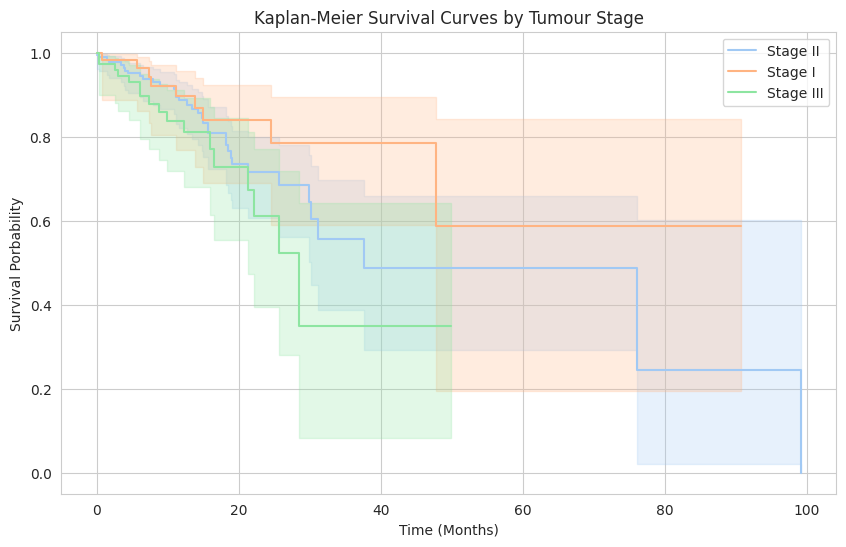

In [29]:
# Identify the unique TUmour Stages in the dataset

# Convert 'patient_status' to 0 for censored and 1 for an event
df_clean['Event']= df_clean['Patient_Status'].map({'Alive':0, 'Dead':1})

df_clean= df_clean.dropna(subset= ['Tumour_Stage'])

T= df_clean['Survival_Time_Months']
E= df_clean['Event']

unique_tumour_stage= df_clean['Tumour_Stage'].unique()

# Check if the KaplanMeierFitter class is available
if KaplanMeierFitter is not None:
    plt.figure(figsize= (10,6))

    # Tumour Stage
    for tumour_stage in unique_tumour_stage:
        mask= df_clean['Tumour_Stage'] == tumour_stage
        kmf.fit(T[mask], E[mask], label=f'Stage {tumour_stage}')
        kmf.plot_survival_function()

    plt.title('Kaplan-Meier Survival Curves by Tumour Stage')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Porbability')

    plt.show()

else:
    # lifelines is not available, so we'll create a workaround
    survival_data_tumour = df_clean.groupby(['Survival_Time_Months', 'Tumour_Stage', 'Patient_Status']).size().unstack().fillna(0)
    survival_data_tumour['total'] = survival_data_tumour.sum(axis=1)
    survival_data_tumour['censored'] = survival_data_tumour['Alive'].cumsum()
    survival_data_tumour['events'] = survival_data_tumour['Dead'].cumsum()
    survival_data_tumour['at_risk'] = survival_data_tumour['total'].sum() - survival_data_tumour['censored'].shift(1).fillna(0)
    survival_data_tumour['deaths'] = survival_data_tumour['Dead'] / survival_data_tumour['at_risk']
    survival_data_tumour['survival'] = (1 - survival_data_tumour['deaths']).cumprod()

    plt.figure(figsize= (10,6))

    for tumour_stage in unique_tumour_stages:
        survival_data_subset= survival_data_stage.xs(tumour_stage, level= 'Tumour_Stage')
        plt.step(survival_data_subset.index, survival_data_subset['survival'], where= 'post', label= f'Stage {tumour_stage}')

    plt.title('Kaplan-Meier Survival Curves by Tumour Stage (workaround)')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.show()

Tumour Stage III is showing the least survival in the patients, whereas Tumour Stage I is showing the highest survival.

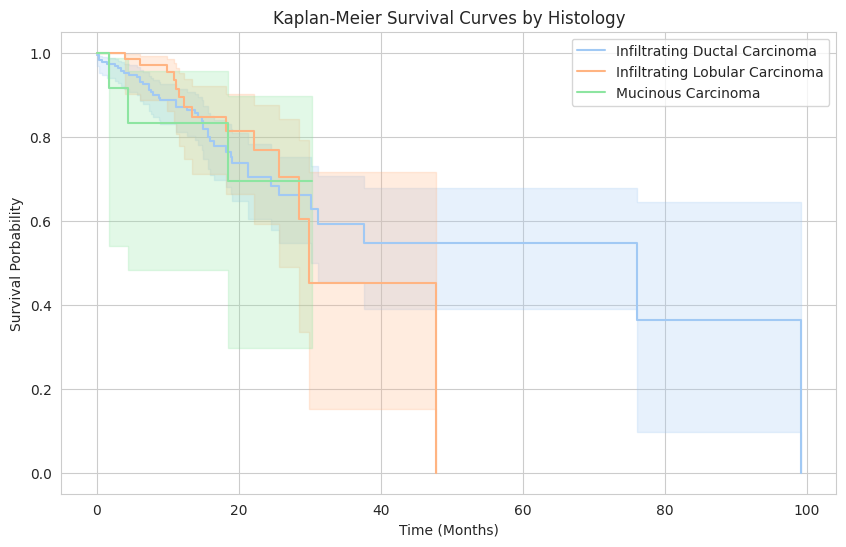

In [30]:
# Identify the unique Histology types in the dataset

# Convert 'patient_status' to 0 for censored and 1 for an event
df_clean['Event']= df_clean['Patient_Status'].map({'Alive':0, 'Dead':1})

df_clean= df_clean.dropna(subset= ['Histology'])

T= df_clean['Survival_Time_Months']
E= df_clean['Event']

unique_histologies= df_clean['Histology'].unique()

# Check if the KaplanMeierFitter class is available
if KaplanMeierFitter is not None:
    plt.figure(figsize= (10,6))

    # Tumour Stage
    for histology in unique_histologies:
        mask= df_clean['Histology'] == histology
        kmf.fit(T[mask], E[mask], label=f'{histology}')
        kmf.plot_survival_function()

    plt.title('Kaplan-Meier Survival Curves by Histology')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Porbability')

    plt.show()

else:
    # lifelines is not available, so we'll create a workaround
    survival_data_histology = df_clean.groupby(['Survival_Time_Months', 'Histology', 'Patient_Status']).size().unstack().fillna(0)
    survival_data_histology['total'] = survival_data_histology.sum(axis=1)
    survival_data_histology['censored'] = survival_data_histology['Alive'].cumsum()
    survival_data_histology['events'] = survival_data_histology['Dead'].cumsum()
    survival_data_histology['at_risk'] = survival_data_histology['total'].sum() - survival_data_histology['censored'].shift(1).fillna(0)
    survival_data_histology['deaths'] = survival_data_histology['Dead'] / survival_data_histology['at_risk']
    survival_data_histology['survival'] = (1 - survival_data_histology['deaths']).cumprod()

    plt.figure(figsize= (10,6))

    for tumour_stage in unique_histologies:
        survival_data_subset= survival_data_histology.xs(histology, level= 'Tumour_Stage')
        plt.step(survival_data_subset.index, survival_data_subset['survival'], where= 'post', label= f'Stage {histology}')

    plt.title('Kaplan-Meier Survival Curves by Histology (workaround)')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.show()

Mucinous Carcinoma is showing the least survival, whereas Infiltrating Ductal is showing the highest survival in the pateints.

In [31]:
# Define age groups in increments of 10 years
bins= range(0, df_clean['Age'].max() + 10, 10)
labels = [f'{i}-{i+10}' for i in bins[: -1]]
df_clean['Age_group']= pd.cut(df_clean['Age'], bins= bins, labels= labels, right= False)

# Identify the unique Age groups in the datasets
unique_age_groups= df_clean['Age_group'].unique()

In [32]:
# Convert 'patient_status' to 0 for censored and 1 for an event
df_clean['Event']= df_clean['Patient_Status'].map({'Alive':0, 'Dead':1})

df_clean= df_clean.dropna(subset= ['Age_group'])

T= df_clean['Survival_Time_Months']
E= df_clean['Event']

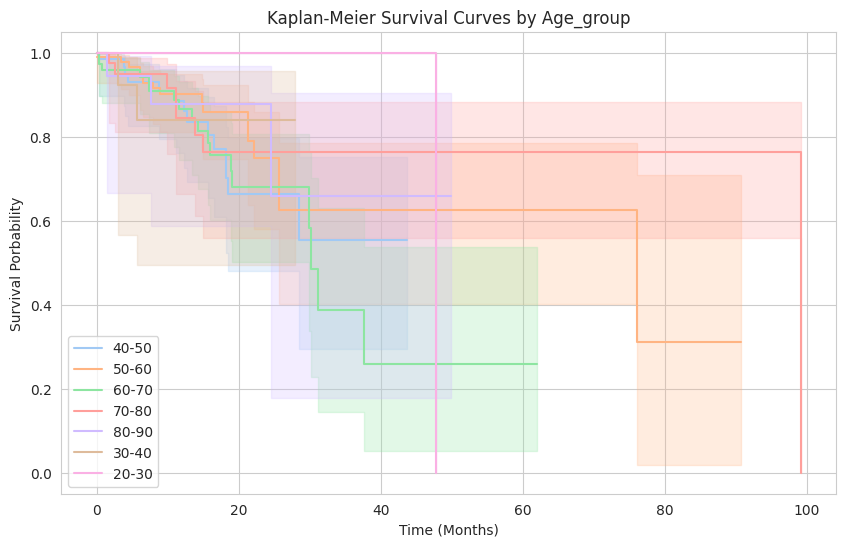

In [33]:
# Identify the unique Histology types in the dataset
df_clean_age= df_clean.dropna(subset= ['Age_group'])

unique_age_group= df_clean_age['Age_group'].unique()

# Check if the KaplanMeierFitter class is available
if KaplanMeierFitter is not None:
    plt.figure(figsize= (10,6))

    # Age group
    for age_group in unique_age_group:
        mask= df_clean_age['Age_group'] == age_group
        kmf.fit(T[mask], E[mask], label=f'{age_group}')
        kmf.plot_survival_function()

    plt.title('Kaplan-Meier Survival Curves by Age_group')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Porbability')

    plt.show()

else:
    # lifelines is not available, so we'll create a workaround
    survival_data_age = df_clean.groupby(['Survival_Time_Months', 'Age_group', 'Patient_Status']).size().unstack().fillna(0)
    survival_data_age['total'] = survival_data_age.sum(axis=1)
    survival_data_age['censored'] = survival_data_age['Alive'].cumsum()
    survival_data_age['events'] = survival_data_age['Dead'].cumsum()
    survival_data_age['at_risk'] = survival_data_age['total'].sum() - survival_data_age['censored'].shift(1).fillna(0)
    survival_data_age['deaths'] = survival_data_age['Dead'] / survival_data_age['at_risk']
    survival_data_age['survival'] = (1 - survival_data_age['deaths']).cumprod()

    plt.figure(figsize= (10,6))

    for age_group in unique_age_group:
        survival_data_subset= survival_data_age.xs(age_group, level= 'Age_group')
        plt.step(survival_data_subset.index, survival_data_subset['survival'], where= 'post', label= f'Stage {age_group}')

    plt.title('Kaplan-Meier Survival Curves by Age Group (workaround)')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.show();

70-80 age group people are showing the highest survival, whereas 40-50 is showing the least survival.

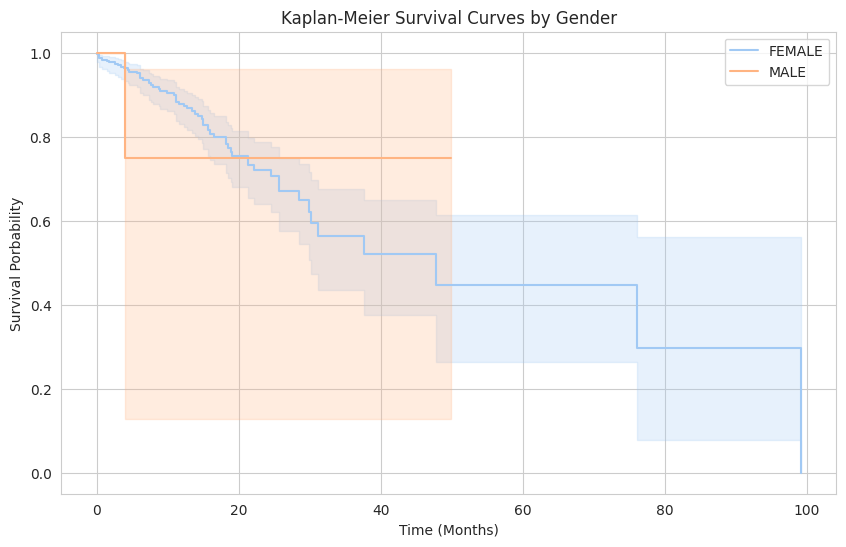

In [34]:
# Identify the unique Genders in the dataset
df_clean_gender= df_clean.dropna(subset= ['Gender'])

unique_gender= df_clean_gender['Gender'].unique()

# Check if the KaplanMeierFitter class is available
if KaplanMeierFitter is not None:
    plt.figure(figsize= (10,6))

    # Age group
    for gender in unique_gender:
        mask= df_clean_gender['Gender'] == gender
        kmf.fit(T[mask], E[mask], label=f'{gender}')
        kmf.plot_survival_function()

    plt.title('Kaplan-Meier Survival Curves by Gender')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Porbability')

    plt.show()

else:
    # lifelines is not available, so we'll create a workaround
    survival_data_gender = df_clean.groupby(['Survival_Time_Months', 'Gender', 'Patient_Status']).size().unstack().fillna(0)
    survival_data_gender['total'] = survival_data_gender.sum(axis=1)
    survival_data_gender['censored'] = survival_data_gender['Alive'].cumsum()
    survival_data_gender['events'] = survival_data_gender['Dead'].cumsum()
    survival_data_gender['at_risk'] = survival_data_gender['total'].sum() - survival_data_gender['censored'].shift(1).fillna(0)
    survival_data_gender['deaths'] = survival_data_gender['Dead'] / survival_data_gender['at_risk']
    survival_data_gender['survival'] = (1 - survival_data_gender['deaths']).cumprod()

    plt.figure(figsize= (10,6))

    for gender in unique_gender:
        survival_data_subset= survival_data_gender.xs(gender, level= 'Gender')
        plt.step(survival_data_subset.index, survival_data_subset['survival'], where= 'post', label= f'Stage {gender}')

    plt.title('Kaplan-Meier Survival Curves by Gender (workaround)')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.show()

Female patients are likely showing more survival compared to male patients.

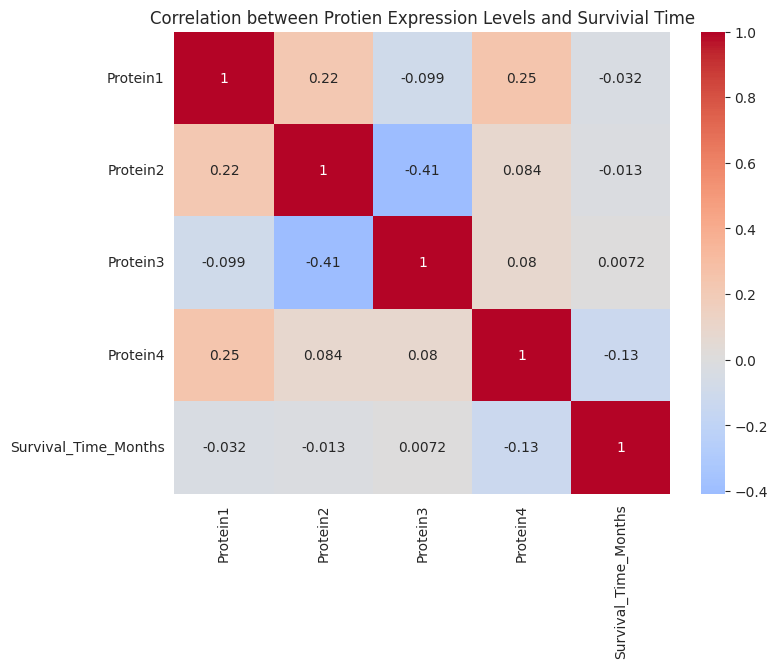

In [35]:
# Calculate the correlation between protein expression levels and survival time
protein_cols= ['Protein1', 'Protein2', 'Protein3', 'Protein4']
correlation= df_clean[protein_cols + ['Survival_Time_Months']].corr()

# Plot the correlation matrix
plt.figure(figsize= (8,6))
sns.heatmap(correlation, annot= True, cmap= 'coolwarm', center= 0)
plt.title('Correlation between Protien Expression Levels and Survivial Time')
plt.show()

Protein2 is showing the highest expression, whereas Protein3 is showing the least expression, when correlated with Survival Time.

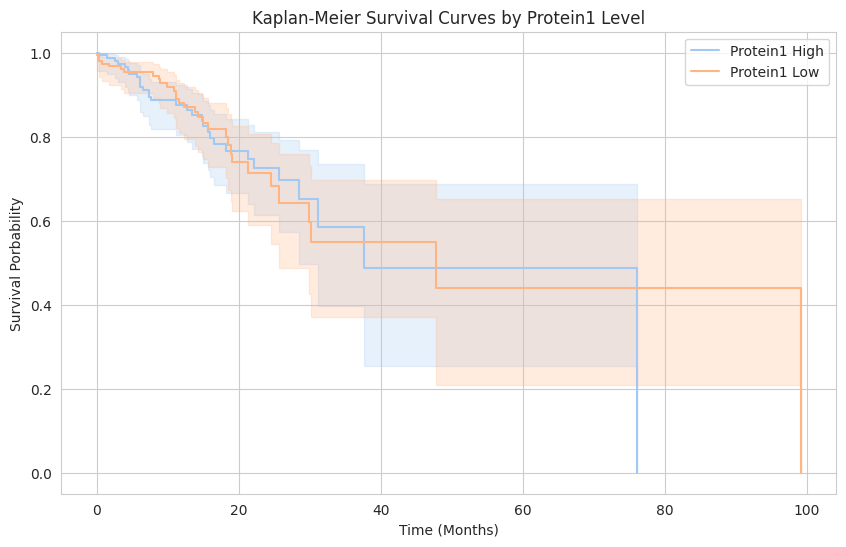

In [36]:
# Divide patients into 'High' & 'Low' Protein expression groups
median_protein1= df_clean['Protein1'].median()
df_clean['Protein1_Level']= ['High' if p > median_protein1 else 'Low' for p in df_clean['Protein1']]

# Identify the unique Protein1 Levels in the dataset
unique_protein1_levels= df_clean['Protein1_Level'].unique()

# Check if the KaplanMeierFitter class is available
if KaplanMeierFitter is not None:
    plt.figure(figsize= (10,6))

    # Protein1 Level
    for protein1_level in unique_protein1_levels:
        mask= df_clean['Protein1_Level'] == protein1_level
        kmf.fit(T[mask], E[mask], label= f'Protein1 {protein1_level}')
        kmf.plot_survival_function()

    plt.title('Kaplan-Meier Survival Curves by Protein1 Level')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Porbability')

    plt.show()

else:
    # lifelines is not available, so we'll create a workaround
    survival_data_protein1 = df_clean.groupby(['Survival_Time_Months', 'Protein1_Level', 'Patient_Status']).size().unstack().fillna(0)
    survival_data_protein1['total'] = survival_data_protein1.sum(axis=1)
    survival_data_protein1['censored'] = survival_data_protein1['Alive'].cumsum()
    survival_data_protein1['events'] = survival_data_protein1['Dead'].cumsum()
    survival_data_protein1['at_risk'] = survival_data_protein1['total'].sum() - survival_data_protein1['censored'].shift(1).fillna(0)
    survival_data_protein1['deaths'] = survival_data_protein1['Dead'] / survival_data_protein1['at_risk']
    survival_data_protein1['survival'] = (1 - survival_data_protein1['deaths']).cumprod()

    plt.figure(figsize= (10,6))

    for protein1_level in unique_protein1_levels:
        survival_data_subset= survival_data_protein1.xs(protein1_group, level= 'Protein1_Level')
        plt.step(survival_data_subset.index, survival_data_subset['survival'], where= 'post', label= f'Protein1 {protein1_level}')

    plt.title('Kaplan-Meier Survival Curves by Protein1 Level (workaround)')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Probability')
    plt.legend()
    plt.show();

Protein1 Low is showing higher survival in patients when compared to Protein1 High Level

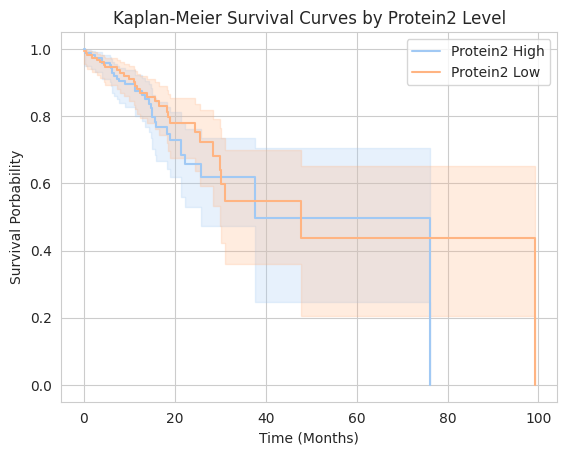

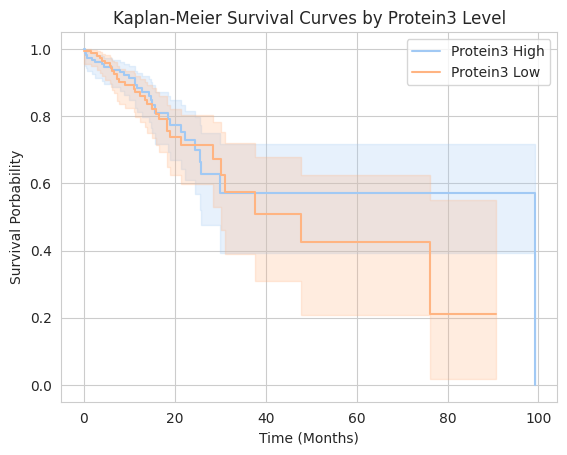

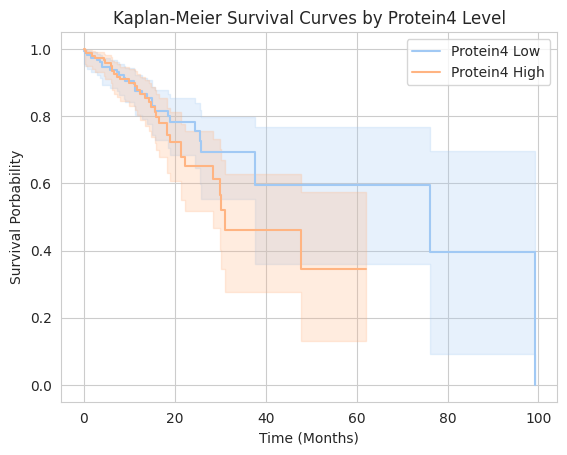

In [37]:
# Divide patients into 'High' and 'Low' Protein2, Protein3, and Protein4 expression groups
for protein in ['Protein2', 'Protein3', 'Protein4']:
    median_protein= df_clean[protein].median()
    df_clean[protein + '_Level'] = ['High' if p> median_protein else 'Low' for p in df_clean[protein]]

# Identify the unique Protein2, Protein3, and Protein4 Levels in the dataset
unique_protein2_levels= df_clean['Protein2_Level'].unique()
unique_protein3_levels= df_clean['Protein3_Level'].unique()
unique_protein4_levels= df_clean['Protein4_Level'].unique()

# Check if the KaplanMeierFitter class is available
if KaplanMeierFitter is not None:
    # Protein2 Level
    for protein2_level in unique_protein2_levels:
        mask= df_clean['Protein2_Level'] == protein2_level
        kmf.fit(T[mask], E[mask], label= f'Protein2 {protein2_level}')
        kmf.plot_survival_function()
    plt.title('Kaplan-Meier Survival Curves by Protein2 Level')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Porbability')
    plt.show()

    # Protein3 Level
    for protein3_level in unique_protein3_levels:
        mask= df_clean['Protein3_Level'] == protein3_level
        kmf.fit(T[mask], E[mask], label= f'Protein3 {protein3_level}')
        kmf.plot_survival_function()
    plt.title('Kaplan-Meier Survival Curves by Protein3 Level')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Porbability')
    plt.show()

    # Protein4 Level
    for protein4_level in unique_protein4_levels:
        mask= df_clean['Protein4_Level'] == protein4_level
        kmf.fit(T[mask], E[mask], label= f'Protein4 {protein4_level}')
        kmf.plot_survival_function()
    plt.title('Kaplan-Meier Survival Curves by Protein4 Level')
    plt.xlabel('Time (Months)')
    plt.ylabel('Survival Porbability')
    plt.show()

else:
    # lifelines is not available, so we'll create a workaround
    for protein, unique_protein_levels in [('Protein2', unique_protein2_levels), ('Protein3', unique_protein3_levels), ('Protein4', unique_protein4_levels)]:
        survival_data_protein = df_clean.groupby(['Survival_Time_Months', protein +'_Level', 'Patient_Status']).size().unstack().fillna(0)
        survival_data_protein['total'] = survival_data_protein.sum(axis=1)
        survival_data_protein['censored'] = survival_data_protein['Alive'].cumsum()
        survival_data_protein['events'] = survival_data_protein['Dead'].cumsum()
        survival_data_protein['at_risk'] = survival_data_protein['total'].sum() - survival_data_protein['censored'].shift(1).fillna(0)
        survival_data_protein['deaths'] = survival_data_protein['Dead'] / survival_data_protein['at_risk']
        survival_data_protein['survival'] = (1 - survival_data_protein['deaths']).cumprod()

        plt.figure(figsize= (10,6))

        for protein1_level in unique_protein_levels:
            survival_data_subset= survival_data_protein.xs(protein1_group, level= protein + '_Level')
            plt.step(survival_data_subset.index, survival_data_subset['survival'], where= 'post', label= f'{protein}{protein1_level}')
        plt.title('Kaplan-Meier Survival Curves by {protein} Level (workaround)')
        plt.xlabel('Time (Months)')
        plt.ylabel('Survival Probability')
        plt.legend()
        plt.show()

Patients with high levels of Protein3 and Protein4 exhibit higher survival rates, while those with low levels of Protein2 show increased survival.

## Model Building

### 1. Logistic Regression Classifier

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Convert categorical variables into numerical variables
le= LabelEncoder()
df_logistic= df_clean.copy()
df_logistic['Gender'] = le.fit_transform(df_logistic['Gender'])
df_logistic['Tumour_Stage'] = le.fit_transform(df_logistic['Tumour_Stage'])
df_logistic['Histology'] = le.fit_transform(df_logistic['Histology'])
df_logistic['Surgery_type'] = le.fit_transform(df_logistic['Surgery_type'])
df_logistic['Patient_Status'] = le.fit_transform(df_logistic['Patient_Status'])

# Define predictor variables and outcome variables
X= df_logistic[['Age', 'Gender','Tumour_Stage', 'Histology', 'Surgery_type', 'Protein1', 'Protein2', 'Protein3', 'Protein4']]
y= df_logistic['Patient_Status']

# Split the data into training set and test set
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 42)

In [39]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use a smaller parameter space for Logistic Regression
param_dist_lr = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10]
}

# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Initialize RandomizedSearchCV for Logistic Regression
random_search_lr = RandomizedSearchCV(lr_model, param_distributions=param_dist_lr, n_iter=10, cv=5, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the training data
random_search_lr.fit(X_train, y_train)

# Get the best parameters and best estimator from the random search
best_params_lr = random_search_lr.best_params_
best_lr_model = random_search_lr.best_estimator_

# Predict on the test set using the best model
y_pred_lr = best_lr_model.predict(X_test)

lr_train_accuracy = best_lr_model.score(X_train, y_train)
print("Logistic Regression Training Accuracy:", lr_train_accuracy)

# Calculate and print the test accuracy
lr_test_accuracy = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Test Accuracy:", lr_test_accuracy)

print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_lr))

conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix_lr)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Logistic Regression Training Accuracy: 0.8015873015873016
Logistic Regression Test Accuracy: 0.8125
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        52
           1       0.00      0.00      0.00        12

    accuracy                           0.81        64
   macro avg       0.41      0.50      0.45        64
weighted avg       0.66      0.81      0.73        64

Confusion Matrix:
[[52  0]
 [12  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Confusion Matrix as Heatmap

In [81]:
# Define a function to plot confusion matrix as heatmap
def plot_confusion_matrix(conf_matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

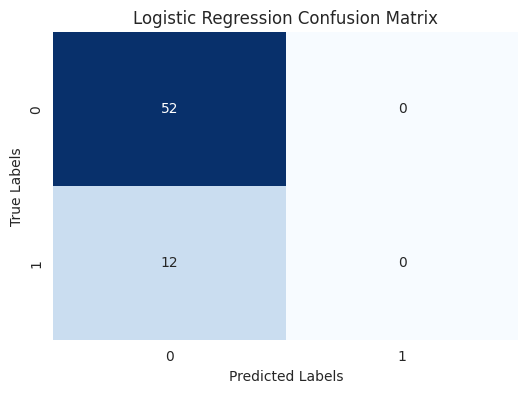

In [82]:
# Plot confusion matrices for each model
plot_confusion_matrix(conf_matrix_lr, 'Logistic Regression Confusion Matrix')

### 2. Random Forest Classifier

In [40]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define an expanded parameter space
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with more iterations
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train, y_train)

# Get the best parameters and best estimator from the random search
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Predict on the test set using the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the Random Forest model
#accuracy_rf = accuracy_score(y_test, y_pred_rf)
#print("Random Forest Accuracy:", accuracy_rf)
# Calculate and print the training accuracy
rf_train_accuracy = best_rf_model.score(X_train, y_train)
print("Random Forest Training Accuracy:", rf_train_accuracy)

# Calculate and print the test accuracy
rf_test_accuracy = accuracy_score(y_test, y_pred_rf)
print("Random Forest Test Accuracy:", rf_test_accuracy)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Forest Training Accuracy: 0.9603174603174603
Random Forest Test Accuracy: 0.796875
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        52
           1       0.00      0.00      0.00        12

    accuracy                           0.80        64
   macro avg       0.40      0.49      0.44        64
weighted avg       0.66      0.80      0.72        64

Confusion Matrix:
[[51  1]
 [12  0]]


"Oversampling" to address class imbalance in a classification problem. Class imbalance occurs when one class (usually the minority class) has significantly fewer samples than the other class (majority class).

This oversampling technique is commonly used when dealing with imbalanced datasets to prevent the model from being biased toward the majority class and potentially improving the model's performance on the minority class.

In [41]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split

# Separate the majority and minority classes
df_majority = df_logistic[df_logistic['Patient_Status'] == 0]
df_minority = df_logistic[df_logistic['Patient_Status'] == 1]

# Upsample the minority class to match the number of samples in the majority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=len(df_majority), random_state=42)

# Combine the majority class and the upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Define predictor variables & outcome variables
X_upsampled = df_upsampled[['Age', 'Gender', 'Tumour_Stage', 'Histology', 'Surgery_type', 'Protein1', 'Protein2', 'Protein3', 'Protein4']]
y_upsampled = df_upsampled['Patient_Status']

# Split the data into training set and test set
X_train_upsampled, X_test_upsampled, y_train_upsampled, y_test_upsampled = train_test_split(X_upsampled, y_upsampled, test_size=0.2, random_state=42)


In [42]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define an expanded parameter space
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 3, 5, 7],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV with more iterations
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=50, cv=5, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_upsampled, y_train_upsampled)

# Get the best parameters and best estimator from the random search
best_params = random_search.best_params_
best_rf_model = random_search.best_estimator_

# Predict on the test set using the best model
y_pred_rf = best_rf_model.predict(X_test_upsampled)

# Evaluate the Random Forest model
rf_train_accuracy = best_rf_model.score(X_train_upsampled, y_train_upsampled)
print("Random Forest Training Accuracy:", rf_train_accuracy)

# Calculate and print the test accuracy
rf_test_accuracy = accuracy_score(y_test_upsampled, y_pred_rf)
print("Random Forest Test Accuracy:", rf_test_accuracy)

print("Random Forest Classification Report:")
print(classification_report(y_test_upsampled, y_pred_rf))
conf_matrix_rf = confusion_matrix(y_test_upsampled, y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix_rf)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Random Forest Training Accuracy: 1.0
Random Forest Test Accuracy: 0.9607843137254902
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96        53
           1       0.98      0.94      0.96        49

    accuracy                           0.96       102
   macro avg       0.96      0.96      0.96       102
weighted avg       0.96      0.96      0.96       102

Confusion Matrix:
[[52  1]
 [ 3 46]]


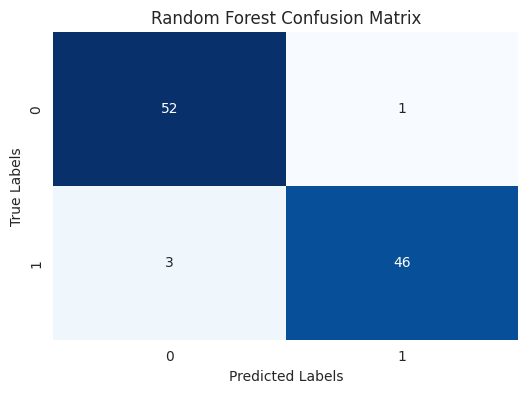

In [83]:
# Plot confusion matrices for each model
plot_confusion_matrix(conf_matrix_rf, 'Random Forest Confusion Matrix')

#### Feature importances using Random Forest Classifier

In [43]:
# Compute feature importances after fitting the model
importances = best_rf_model.feature_importances_

# Create a DataFrame to hold the feature names and their corresponding importance values
feature_importances = pd.DataFrame({'feature': X_train_upsampled.columns, 'importance': importances})

# Sort the DataFrame by the importance values
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Display the feature importances
print(feature_importances)


        feature  importance
6      Protein2    0.193999
8      Protein4    0.186108
5      Protein1    0.165359
7      Protein3    0.162422
0           Age    0.136727
4  Surgery_type    0.066011
2  Tumour_Stage    0.055742
3     Histology    0.029946
1        Gender    0.003686


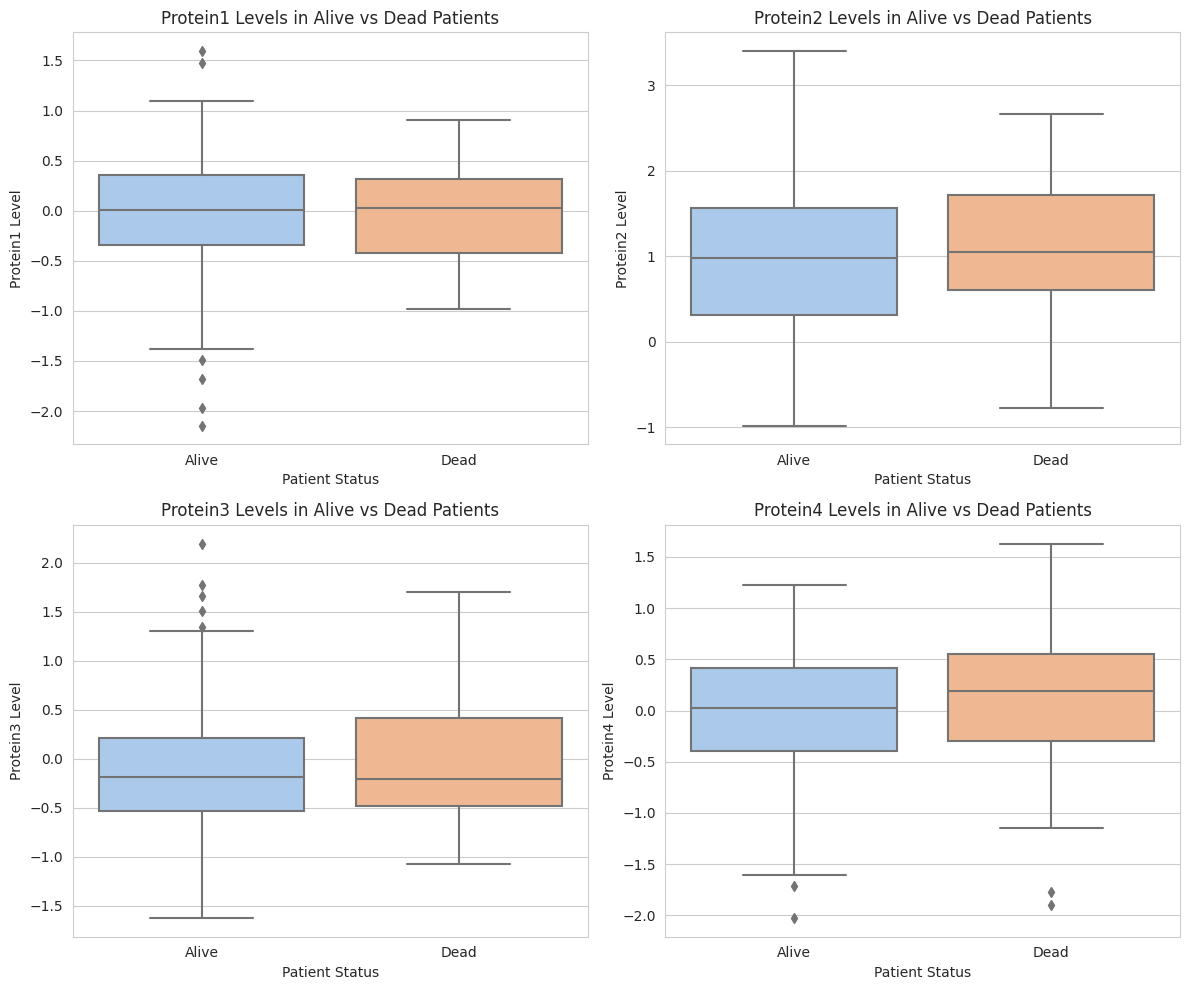

In [44]:
# Create boxplots for Protein1, Protein2, Protein3 & Protein4 levels in the two groups of patients (Alive & Dead)
fig, axes= plt.subplots(2,2, figsize= (12,10))

for ax, protein in zip(axes.flatten(), ['Protein1', 'Protein2', 'Protein3', 'Protein4']):
    sns.boxplot(x= 'Patient_Status', y= protein, data= df_clean, ax=ax)
    ax.set_title(f'{protein} Levels in Alive vs Dead Patients')
    ax.set_xlabel('Patient Status')
    ax.set_ylabel(f'{protein} Level')

plt.tight_layout()
plt.show()

From the above we can conclude that Protein1 is only showing slightly high expression in Alive patients whereas Protein2, Protein3, Protein4 is highly expressed in Dead patients.

In [45]:
from scipy.stats import mannwhitneyu

# Initialize an empty DataFrame to hold the results of the Mann-Whitney U tests
mann_whitney_results= pd.DataFrame(columns= ['Protein', 'U Statistic', 'P Value'])

# Perform the MannWhitney U test for each protein
for protein in ['Protein1', 'Protein2', 'Protein3', 'Protein4']:
    alive= df_clean.loc[df_clean['Patient_Status']== 'Alive', protein]
    dead= df_clean.loc[df_clean['Patient_Status']== 'Dead', protein]
    u_statistic, p_value = mannwhitneyu(alive, dead)
    mann_whitney_results= mann_whitney_results.append({'Protein': protein, 'U Statistic': u_statistic, 'P Value': p_value}, ignore_index= True)

# Display the results of the Mann-whitney U tests
print(mann_whitney_results)

    Protein  U Statistic   P Value
0  Protein1       8204.5  0.608905
1  Protein2       7040.0  0.196263
2  Protein3       7613.0  0.686298
3  Protein4       7051.5  0.202507


<ipython-input-45-c3a4be5e8e32>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mann_whitney_results= mann_whitney_results.append({'Protein': protein, 'U Statistic': u_statistic, 'P Value': p_value}, ignore_index= True)
<ipython-input-45-c3a4be5e8e32>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mann_whitney_results= mann_whitney_results.append({'Protein': protein, 'U Statistic': u_statistic, 'P Value': p_value}, ignore_index= True)
<ipython-input-45-c3a4be5e8e32>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mann_whitney_results= mann_whitney_results.append({'Protein': protein, 'U Statistic': u_statistic, 'P Value': p_value}, ignore_index= True)
<ipython-input-45-c3a4be5e8e32>:11: FutureWarning: The frame.append

In [46]:
# Convert 'Tumour_Stage ' and 'Surgery_type' to numeric types
df_clean['Tumour_Stage'] = df_clean['Tumour_Stage'].astype('category').cat.codes
df_clean['Surgery_type'] = df_clean['Surgery_type'].astype('category').cat.codes

# Recalculate correlation coefficients for Protein1, Protein2, Protein3 and Protein4 levels against Tumour_Stage, Surgery_type and Age
correlation_results= pd.DataFrame(columns= ['Variable', 'Protein', 'Correlation Coefficient'])

for variable in ['Tumour_Stage', 'Surgery_type', 'Age']:
    for protein in ['Protein1', 'Protein2', 'Protein3', 'Protein4']:
        correlation_coefficient = df_clean[protein].corr(df_clean[variable])
        correlation_results= correlation_results.append({'Variable': variable, 'Protein': protein, 'Correlation Coefficient': correlation_coefficient}, ignore_index= True)

print(correlation_results)

        Variable   Protein  Correlation Coefficient
0   Tumour_Stage  Protein1                -0.040528
1   Tumour_Stage  Protein2                -0.049164
2   Tumour_Stage  Protein3                 0.016838
3   Tumour_Stage  Protein4                -0.043854
4   Surgery_type  Protein1                -0.133145
5   Surgery_type  Protein2                -0.045611
6   Surgery_type  Protein3                -0.059004
7   Surgery_type  Protein4                -0.116142
8            Age  Protein1                -0.025670
9            Age  Protein2                -0.009992
10           Age  Protein3                -0.052972
11           Age  Protein4                 0.108333


<ipython-input-46-dc69911f82ea>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results= correlation_results.append({'Variable': variable, 'Protein': protein, 'Correlation Coefficient': correlation_coefficient}, ignore_index= True)
<ipython-input-46-dc69911f82ea>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results= correlation_results.append({'Variable': variable, 'Protein': protein, 'Correlation Coefficient': correlation_coefficient}, ignore_index= True)
<ipython-input-46-dc69911f82ea>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  correlation_results= correlation_results.append({'Variable': variable, 'Protein': protein, 'Correlation Coefficient': correlation_coefficient}, ignore_index= T

### 3. Gradient Boosting Classifier

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define hyperparameter distributions for Gradient Boosting
gb_param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Create a RandomizedSearchCV object for hyperparameter tuning
random_search_gb = RandomizedSearchCV(gb_classifier, param_distributions=gb_param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the full training data
random_search_gb.fit(X_train_upsampled, y_train_upsampled)

# Get the best Gradient Boosting classifier from the random search
best_gb_classifier = random_search_gb.best_estimator_

# Predictions using the best estimator
gb_y_pred = best_gb_classifier.predict(X_test_upsampled)

# Calculate accuracy
gb_train_accuracy = best_rf_model.score(X_train_upsampled, y_train_upsampled)
print("Gradient Boosting Training Accuracy:", gb_train_accuracy)
gb_test_accuracy = accuracy_score(y_test_upsampled, gb_y_pred)
print("Gradient Boosting Test Accuracy:", gb_test_accuracy)

# Print classification report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test_upsampled, gb_y_pred))

# Confusion Matrix
gb_conf_matrix = confusion_matrix(y_test_upsampled, gb_y_pred)
print("Gradient Boosting Confusion Matrix:")
print(gb_conf_matrix)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Gradient Boosting Training Accuracy: 1.0
Gradient Boosting Test Accuracy: 0.9509803921568627
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.94      0.96      0.95        49

    accuracy                           0.95       102
   macro avg       0.95      0.95      0.95       102
weighted avg       0.95      0.95      0.95       102

Gradient Boosting Confusion Matrix:
[[50  3]
 [ 2 47]]


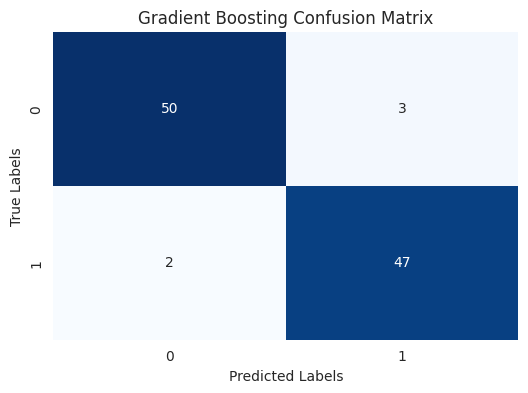

In [84]:
# Plot confusion matrices for each model
plot_confusion_matrix(gb_conf_matrix, 'Gradient Boosting Confusion Matrix')

#### Feature importances using Gradient Boosting Classifier

In [48]:
# Create feature importances
importances_gb= best_gb_classifier.feature_importances_

# Create a DataFrame to hold the feature names and their corresponding importance values
feature_importances_gb= pd.DataFrame({'feature': X_train_upsampled.columns, 'importance': importances_gb})

# Sort the Dataframe by the importance values
feature_importances_gb= feature_importances_gb.sort_values('importance', ascending= False)

# Display the feature importances
feature_importances_gb

,feature,importance
6,Protein2,0.242956
5,Protein1,0.198314
8,Protein4,0.173074
0,Age,0.115420
7,Protein3,0.104701
4,Surgery_type,0.087171
2,Tumour_Stage,0.059743
3,Histology,0.018253
1,Gender,0.000368


## 4. Support Vector Machine (SVM)

In [53]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Initialize the SVM model
svm_model = SVC()

# Define a smaller parameter search space
param_dist = {
    'C': [0.1, 1.0, 10.0],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'] + [0.1, 1.0]
}

# Reduce the number of iterations
n_iter = 5

# Create a RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, n_iter=20, cv=5, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the training data
random_search.fit(X_train_upsampled, y_train_upsampled)

# Get the best SVM model from the random search
best_svm_model = random_search.best_estimator_

# Predict on the test set using the best model
y_pred_svm = best_svm_model.predict(X_test_upsampled)

# Evaluate the best SVM model
# Calculate accuracy
svm_train_accuracy = best_rf_model.score(X_train_upsampled, y_train_upsampled)
print("SVM Training Accuracy:", svm_train_accuracy)
svm_test_accuracy = accuracy_score(y_test_upsampled, y_pred_svm)
print("SVM Test Accuracy:", svm_test_accuracy)

print("Classification Report:")
print(classification_report(y_test_upsampled, y_pred_svm))
conf_matrix_svm = confusion_matrix(y_test_upsampled, y_pred_svm)
print("Confusion Matrix:")
print(conf_matrix_svm)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
SVM Training Accuracy: 1.0
SVM Test Accuracy: 0.9705882352941176
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        53
           1       1.00      0.94      0.97        49

    accuracy                           0.97       102
   macro avg       0.97      0.97      0.97       102
weighted avg       0.97      0.97      0.97       102

Confusion Matrix:
[[53  0]
 [ 3 46]]


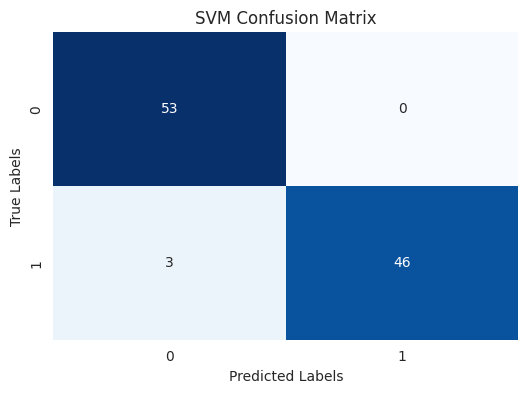

In [85]:
# Plot confusion matrices for each model
plot_confusion_matrix(conf_matrix_svm, 'SVM Confusion Matrix')

## 5. Neural Network model

In [49]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define the parameter space for Neural Network
param_dist_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'relu'],
    'alpha': [0.0001, 0.001, 0.01, 0.1]
}

# Initialize the Neural Network model
nn_model = MLPClassifier()

# Initialize RandomizedSearchCV for Neural Network
random_search_nn = RandomizedSearchCV(nn_model, param_distributions=param_dist_nn, n_iter=10, cv=5, n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the full training data
random_search_nn.fit(X_train_upsampled, y_train_upsampled)

# Get the best parameters and best estimator from the random search
best_params_nn = random_search_nn.best_params_
best_nn_model = random_search_nn.best_estimator_

# Predict on the test set using the best model
y_pred_nn = best_nn_model.predict(X_test_upsampled)

# Evaluate the Neural Network model
# Calculate accuracy
nn_train_accuracy = best_rf_model.score(X_train_upsampled, y_train_upsampled)
print("Neural Network Training Accuracy:", nn_train_accuracy)
nn_test_accuracy = accuracy_score(y_test_upsampled, y_pred_nn)
print("Neural Network Test Accuracy:", nn_test_accuracy)

print("Neural Network Classification Report:")
print(classification_report(y_test_upsampled, y_pred_nn))

conf_matrix_nn = confusion_matrix(y_test_upsampled, y_pred_nn)
print("Confusion Matrix:")
print(conf_matrix_nn)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Neural Network Training Accuracy: 1.0
Neural Network Test Accuracy: 0.5196078431372549
Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.92      0.67        53
           1       0.50      0.08      0.14        49

    accuracy                           0.52       102
   macro avg       0.51      0.50      0.40       102
weighted avg       0.51      0.52      0.41       102

Confusion Matrix:
[[49  4]
 [45  4]]


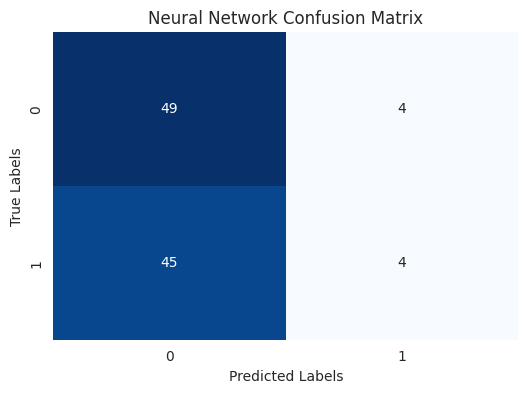

In [86]:
# Plot confusion matrices for each model
plot_confusion_matrix(conf_matrix_nn, 'Neural Network Confusion Matrix')

## 6. XG BOOST

In [51]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define hyperparameter distributions for XGBoost
xgb_param_dist = {
    'n_estimators': [100, 200, 300],  # You can specify the number of trees
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate
    'max_depth': [3, 4, 5],  # Maximum depth of the trees
    'subsample': [0.8, 0.9, 1.0],  # Fraction of samples used for fitting trees
    'colsample_bytree': [0.8, 0.9, 1.0],  # Fraction of features used for fitting trees
}

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier()

# Create a RandomizedSearchCV object for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(xgb_classifier, param_distributions=xgb_param_dist, n_iter=10, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)

# Fit the RandomizedSearchCV object to the full training data
random_search_xgb.fit(X_train_upsampled, y_train_upsampled)

# Get the best XGBoost classifier from the random search
best_xgb_classifier = random_search_xgb.best_estimator_

# Predictions using the best estimator
xgb_y_pred = best_xgb_classifier.predict(X_test_upsampled)

# Calculate accuracy
xgb_train_accuracy = best_xgb_classifier.score(X_train_upsampled, y_train_upsampled)
print("XGBoost Training Accuracy:", xgb_train_accuracy)
xgb_test_accuracy = accuracy_score(y_test_upsampled, xgb_y_pred)
print("XGBoost Test Accuracy:", xgb_test_accuracy)

# Print classification report
print("XGBoost Classification Report:")
print(classification_report(y_test_upsampled, xgb_y_pred))

# Confusion Matrix
xgb_conf_matrix = confusion_matrix(y_test_upsampled, xgb_y_pred)
print("XGBoost Confusion Matrix:")
print(xgb_conf_matrix)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
XGBoost Training Accuracy: 1.0
XGBoost Test Accuracy: 0.8921568627450981
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.85      0.89        53
           1       0.85      0.94      0.89        49

    accuracy                           0.89       102
   macro avg       0.89      0.89      0.89       102
weighted avg       0.90      0.89      0.89       102

XGBoost Confusion Matrix:
[[45  8]
 [ 3 46]]


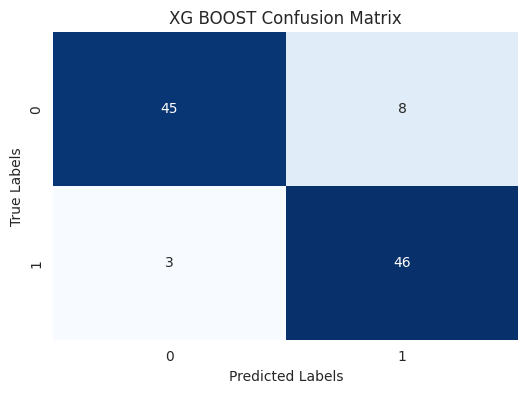

In [87]:
# Plot confusion matrices for each model
plot_confusion_matrix(xgb_conf_matrix, 'XG BOOST Confusion Matrix')

## Model Evaluation

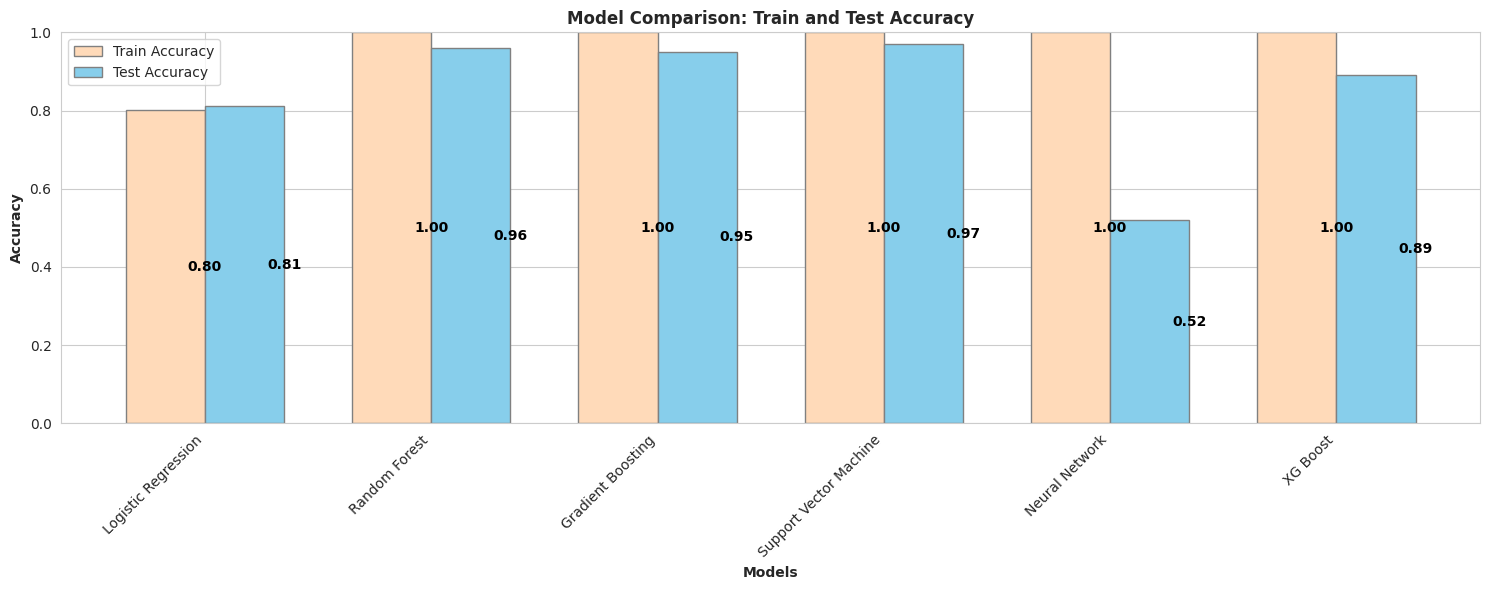

In [56]:
# List of model names and their corresponding accuracies
model_names = ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Support Vector Machine', 'Neural Network', 'XG Boost']
train_accuracies = [lr_train_accuracy, rf_train_accuracy, gb_train_accuracy, svm_train_accuracy, nn_train_accuracy, xgb_train_accuracy]  # Include train accuracies here
test_accuracies = [lr_test_accuracy, rf_test_accuracy, gb_test_accuracy, svm_test_accuracy, nn_test_accuracy, xgb_test_accuracy]  # Include test accuracies here

bar_width = 0.35  # Width of the bars

# Create an array for x-axis positions
r1 = np.arange(len(model_names))
r2 = [x + bar_width for x in r1]

# Create a bar plot
plt.figure(figsize=(15, 6))
plt.bar(r1, train_accuracies, color='PeachPuff', width=bar_width, edgecolor='grey', label='Train Accuracy')
plt.bar(r2, test_accuracies, color='SkyBlue', width=bar_width, edgecolor='grey', label='Test Accuracy')

# Annotate bars with accuracy values inside the bars (centered)
for r1_pos, r2_pos, r1_value, r2_value in zip(r1, r2, train_accuracies, test_accuracies):
    plt.text(r1_pos + bar_width/2, r1_value/2, f'{r1_value:.2f}', ha='center', va='center', fontsize=10, fontweight='bold', color='black')
    plt.text(r2_pos + bar_width/2, r2_value/2, f'{r2_value:.2f}', ha='center', va='center', fontsize=10, fontweight='bold', color='black')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(model_names))], model_names, rotation=45, ha='right')

plt.ylabel('Accuracy', fontweight='bold')
plt.title('Model Comparison: Train and Test Accuracy', fontweight='bold')
plt.legend()
plt.ylim(0, 1.0)  # Set the y-axis limit to ensure readability
plt.tight_layout()
plt.show()

From the above we can conclude that SVM is performing the best whereas Logistic Regression is performing the worst among other models.

## Create interaction terms using:
## i. Logistic Regression:
Logistic Regression uses a linear kernel. Logistic Regression is a linear classification algorithm, and it models the relationship between the input features and the target variable using a linear function. It calculates a weighted sum of the input features and applies the logistic function (sigmoid function) to the result to produce probability scores for binary classification.

The linear kernel assumption in logistic regression means that the decision boundary is a hyperplane, and the algorithm tries to find the best hyperplane that separates the classes in feature space. It's a linear model that works well when the relationship between the features and the target variable is approximately linear.

In [60]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC  # Import the SVM model
from sklearn.metrics import classification_report

# Create interaction terms
poly= PolynomialFeatures(interaction_only= True, include_bias= False)
X_train_interactions= poly.fit_transform(X_train_upsampled)
X_test_interactions= poly.transform(X_test_upsampled)

In [66]:
# Define the logistic Regression Model
logistic_regression_model_interactions= LogisticRegression(max_iter= 10000, random_state=42)

logistic_regression_model_interactions.fit(X_train_interactions, y_train_upsampled)

# Predict the outcomes for the test set
y_pred_lr_interactions= logistic_regression_model_interactions.predict(X_test_interactions)

print(classification_report(y_test_upsampled, y_pred_lr_interactions))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62        53
           1       0.59      0.59      0.59        49

    accuracy                           0.61       102
   macro avg       0.61      0.61      0.61       102
weighted avg       0.61      0.61      0.61       102



#### Coefficients of the Interaction terms using Logistic Regression

In [75]:
# Get the coefficients of the interaction terms
interaction_coefficients= logistic_regression_model_interactions.coef_[0]

# Create a DataFrame to hold the interaction term names and their corresponding coefficient values
interaction_terms= pd.DataFrame({f'interaction_term': poly.get_feature_names_out(X_train_upsampled.columns), 'coefficient': interaction_coefficients})

# Sort the Dataframe by the absolute values of the coefficients
interaction_terms= interaction_terms.reindex(interaction_terms.coefficient.abs().sort_values(ascending= False).index)

# Display the interaction terms and their coefficient
interaction_terms

,interaction_term,coefficient
29,Tumour_Stage Protein4,1.160635
34,Histology Protein4,1.129202
35,Surgery_type Protein1,1.076291
3,Histology,-1.072495
4,Surgery_type,-0.935076
23,Gender Protein4,-0.810030
21,Gender Protein2,0.784440
18,Gender Histology,0.731612
42,Protein2 Protein3,0.660468
25,Tumour_Stage Surgery_type,0.576506


In summary, the above code is used to extract, organize, and rank the interaction terms and their coefficients in a Logistic Regression using Linear Kernel. It helps in understanding which interactions between predictor variables have the most significant impact on the model's predictions.

### Top 10 Interaction Effects on Patient Survival

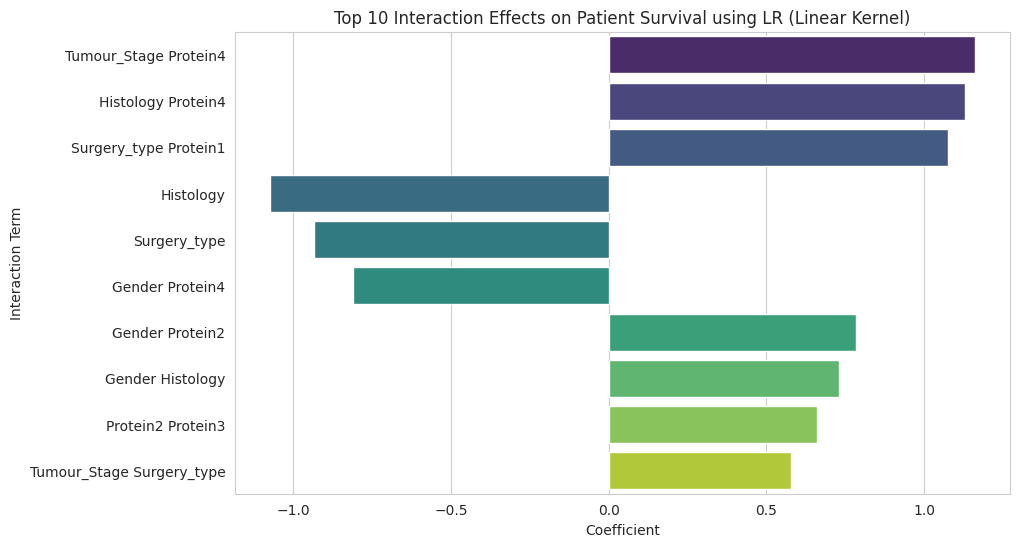

In [76]:
# Select the top 10 interaction terms by absolute coefficient value
top_interaction_terms= interaction_terms.head(10)

# Create a bar plot of the absolute values of the coefficients
plt.figure(figsize= (10,6))
sns.barplot(x= 'coefficient', y= 'interaction_term', data= top_interaction_terms, palette= 'viridis')
plt.title('Top 10 Interaction Effects on Patient Survival using LR (Linear Kernel)')
plt.xlabel('Coefficient')
plt.ylabel('Interaction Term')
plt.show()

"We can deduce the following insights:

1. Protein4 demonstrates a strong correlation with Tumour_Stage and Histology.
2. Protein1 exhibits a significant correlation with Surgery_type.
3. Protein2 displays a notable correlation with Gender and Protein3."

## ii. SVM:
Support Vector Machines (SVM) can use different types of kernels, including the RBF (Radial Basis Function) kernel, to create non-linear decision boundaries. SVM with an RBF kernel is a distinct algorithm from logistic regression, and it is designed to capture non-linear patterns in the data.

In [78]:
# Define the SVM Model with selected hyperparameters
svm_model = SVC(C=1.0, kernel='rbf', gamma='scale')

# Fit the SVM model to the training data
svm_model.fit(X_train_interactions, y_train_upsampled)

# Predict the outcomes for the test set
y_pred_svm_interactions = svm_model.predict(X_test_interactions)

print(classification_report(y_test_upsampled, y_pred_svm_interactions))

              precision    recall  f1-score   support

           0       0.69      0.64      0.67        53
           1       0.64      0.69      0.67        49

    accuracy                           0.67       102
   macro avg       0.67      0.67      0.67       102
weighted avg       0.67      0.67      0.67       102



In [79]:
from sklearn.inspection import permutation_importance

# Fit the SVM model to the training data (if not already fitted)
svm_model.fit(X_train_interactions, y_train_upsampled)

# Calculate permutation importances
result = permutation_importance(svm_model, X_train_interactions, y_train_upsampled, n_repeats=10, random_state=0)

# Create a DataFrame to hold the interaction term names and their corresponding importance values
interaction_terms = pd.DataFrame({
    'interaction_term': poly.get_feature_names_out(X_train_upsampled.columns),
    'importance': result.importances_mean
})

# Sort the DataFrame by the importance values in descending order
interaction_terms = interaction_terms.sort_values(by='importance', ascending=False)

# Display the interaction terms and their importance values
print(interaction_terms)

             interaction_term  importance
12           Age Surgery_type    0.106158
14               Age Protein2    0.093596
10           Age Tumour_Stage    0.088177
16               Age Protein4    0.070936
13               Age Protein1    0.040640
15               Age Protein3    0.018227
11              Age Histology    0.016995
9                  Age Gender    0.002463
0                         Age    0.000739
37      Surgery_type Protein3    0.000000
35      Surgery_type Protein1    0.000000
29      Tumour_Stage Protein4    0.000000
30     Histology Surgery_type    0.000000
31         Histology Protein1    0.000000
32         Histology Protein2    0.000000
33         Histology Protein3    0.000000
34         Histology Protein4    0.000000
36      Surgery_type Protein2    0.000000
38      Surgery_type Protein4    0.000000
43          Protein2 Protein4    0.000000
42          Protein2 Protein3    0.000000
41          Protein1 Protein4    0.000000
27      Tumour_Stage Protein2    0

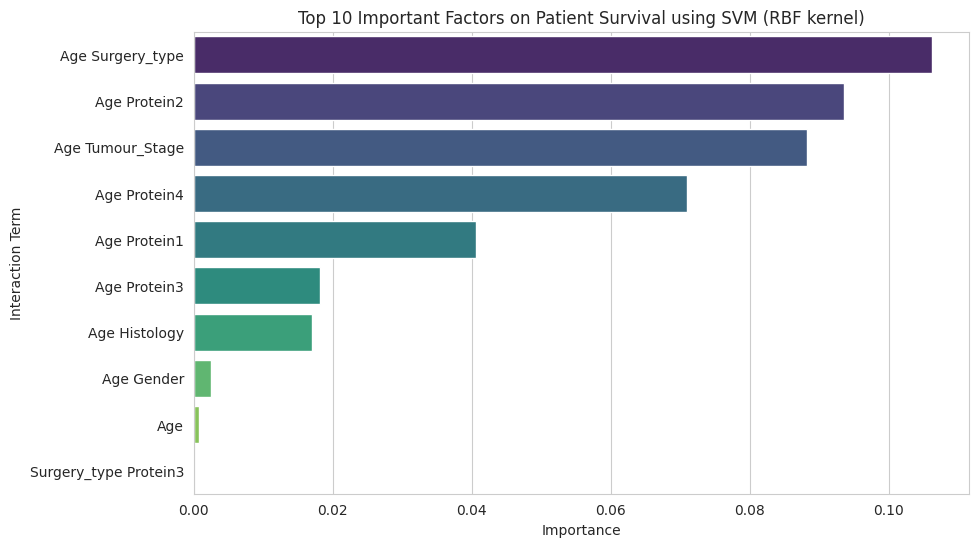

In [80]:
# Select the top 10 interaction terms by absolute coefficient value
top_interaction_terms= interaction_terms.head(10)

# Create a bar plot of the absolute values of the coefficients
plt.figure(figsize= (10,6))
sns.barplot(x='importance', y='interaction_term', data= top_interaction_terms, palette= 'viridis')
plt.title('Top 10 Important Factors on Patient Survival using SVM (RBF kernel)')
plt.xlabel('Importance')
plt.ylabel('Interaction Term')
plt.show()

The age of a patient significantly influences their chances of survival in the context of surgery type, protein2 expression, and tumor stage.